In [1]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Assuming your data is in an Excel file named 'your_data.xlsx'.
file_path = './器件薄膜数据.xlsx'
sheet_name = '2022_07_15_film'

df_film = df_film_20220715 = pd.read_excel(file_path, sheet_name=sheet_name)
print(df_film.columns)

# Renaming the columns
df_film.columns = ['Condition', 'NMP (mL)', 'DMF (mL)', 'DMSO (mL)', 'Perovskite concentration (M)',  'Annealing temperature (℃)', 'Vacuum Pressure (Pa)', 'Vacuum Pressure time (s)', 'Temperature (℃)', 'Humidity (%)', 'Success or Fail']
df_film_20200715 = df_film

# Assuming your data is in an Excel file named 'your_data.xlsx'.
file_path = './器件薄膜数据.xlsx'
sheet_name = '2022_07_21_film'

df_film = df_film_20220721 = pd.read_excel(file_path, sheet_name=sheet_name)
print(df_film.columns)

# Renaming the columns
df_film.columns = ['Condition', 'NMP (mL)', 'DMF (mL)', 'DMSO (mL)', 'Perovskite concentration (M)',  'Annealing temperature (℃)', 'Vacuum Pressure (Pa)', 'Vacuum Pressure time (s)', 'Temperature (℃)', 'Humidity (%)', 'Success or Fail']
df_film_20200721 = df_film

#Merge documents
df_film = pd.concat([df_film_20200715, df_film_20200721], ignore_index = True)


# Filter the successful conditions
success_conditions = df_film[df_film['Success or Fail'] == 1]['Condition'].values

# Display the DataFrame or without the 'Success or Fail' column
df_film.iloc[:, :]

Index(['Condition', 'NMP(mL)', 'DMF(mL)', 'DMSO(mL)',
       'Perovskite concentration(M)', 'Annealing temperature(℃)',
       'Vacuum Pressure(Pa)', 'Vacuum Pressure time(s)', 'Temperature(℃)',
       'humidity(%)', 'Success or Fail'],
      dtype='object')
Index(['Condition', 'NMP(mL)', 'DMF(mL)', 'DMSO(mL)',
       'Perovskite concentration(M)', 'Annealing temperature(℃)',
       'Vacuum Pressure(Pa)', 'Vacuum Pressure time(s)', 'Temperature(℃)',
       'humidity(%)', 'Success or Fail'],
      dtype='object')


,Condition,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Success or Fail
0,1,0,100,0,0.80,110,200,20,25,30,0
1,2,100,0,0,1.30,100,250,25,25,30,1
2,3,0,0,100,1.20,115,100,20,25,30,0
3,4,15,85,0,1.40,125,100,15,25,30,1
4,5,0,15,85,1.10,135,120,17,25,30,1
5,6,15,85,0,1.50,145,100,15,25,30,1
6,7,0,85,15,1.65,155,50,15,25,30,1
7,8,85,0,15,1.70,105,200,15,25,30,1
8,9,15,0,85,1.15,115,100,20,25,30,0
9,10,70,30,0,1.25,120,100,5,25,30,0


In [3]:
import pandas as pd

# Read the first sheet from the Excel file
file_path = './器件薄膜数据.xlsx'
sheet_name = '2022_07_15_device'
df_device_20220715 = pd.read_excel(file_path, sheet_name=sheet_name)

# Read the second sheet from the Excel file
sheet_name = '2022_07_21_device'
df_device_20220721 = pd.read_excel(file_path, sheet_name=sheet_name)

# Define a function to preprocess the data
def preprocess_device_data(df):
    # Rename the columns
    df.columns = ['Condition', 'NMP (mL)', 'DMF (mL)', 'DMSO (mL)', 'Perovskite concentration (M)', 'Annealing temperature (℃)', 'Vacuum Pressure (Pa)', 'Vacuum Pressure time (s)', 'Temperature (℃)', 'Humidity (%)',
                  'Voc(V)', 'FF(%)', 'Eff(%)', 'Jsc(mA/cm^2)']
    return df

# Preprocess the data from both sheets
df_device_20220715 = preprocess_device_data(df_device_20220715)
df_device_20220721 = preprocess_device_data(df_device_20220721)

# Merge the DataFrames
df_device = pd.concat([df_device_20220715, df_device_20220721], ignore_index=True)

# Filter out rows with 'Y' in the 'Condition' column
df_device = df_device[df_device['Condition'] != 'Y']

# Sort the DataFrame and remove duplicate 'Condition' rows, keeping the last occurrence
df_device = df_device.sort_values(by=['Condition', 'Jsc(mA/cm^2)']).drop_duplicates('Condition', keep='last', ignore_index=True)

# Filter the DataFrame to only include rows with 'Condition' in the success_conditions list
# Assuming success_conditions is defined
df_device = df_device[df_device['Condition'].isin(success_conditions)]

# Display the DataFrame
df_device


,Condition,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Voc(V),FF(%),Eff(%),Jsc(mA/cm^2)
1,2,100,0,0,1.30,100,250,25,25,30,0.936879,65.7897,16.20070,26.284000
3,4,15,85,0,1.40,125,100,15,25,30,0.945263,71.2711,17.58020,26.095100
4,5,0,15,85,1.10,135,120,17,25,30,1.003680,74.1679,18.97360,25.488000
5,6,15,85,0,1.50,145,100,15,25,30,0.965233,63.3308,15.94070,26.077100
6,7,0,85,15,1.65,155,50,15,25,30,1.011440,77.0517,20.08790,25.775800
7,8,85,0,15,1.70,105,200,15,25,30,1.000000,63.0401,16.11380,25.561186
10,11,0,30,70,1.30,130,80,35,25,30,1.002430,74.1347,18.93960,25.485700
11,12,30,70,0,1.35,135,200,18,25,30,0.671699,38.9482,6.79034,25.955500
16,17,55,45,0,1.00,125,70,45,25,30,0.989165,54.1555,13.73140,25.633200
17,18,45,55,0,1.20,115,270,47,25,30,0.527735,53.4573,7.06208,25.032800


In [4]:
# Load the dataset
df_previous = pd.read_excel("./限制性数据.xlsx")

# Modify the necessary columns
#df_previous.iloc[:, 2] = df_previous.iloc[:, 2] / 10
#df_previous.iloc[:, 3] = df_previous.iloc[:, 3] / 1000

# Change the column names
df_previous.columns = [
    '',
    'NMP (mL)',
    'DMF (mL)',
    'DMSO (mL)',
    'Perovskite concentration (M)',
    'Annealing temperature (℃)',
    'Vacuum Pressure (Pa)',
    'Vacuum Pressure time (s)',
    'Temperature (℃)',
    'Humidity (%)',
    'Voc(V)',
    'FF(%)',
    'Eff(%)',
    'Jsc(mA/cm^2)'
]

# Remove the first column
df_previous = df_previous.iloc[:, 1:]

df_previous

,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%),Voc(V),FF(%),Eff(%),Jsc(mA/cm^2)
0,0,95,5,1.0,100,150,5,25,40,1.050000,63.5338,16.38920,24.567646
1,0,95,5,1.0,100,150,5,25,40,1.050000,67.8805,15.27600,21.432626
2,0,95,5,1.2,100,150,5,25,40,1.000000,73.5429,18.22120,24.776335
3,0,95,5,1.2,100,150,5,25,40,1.100000,71.5113,19.02740,24.188674
4,0,95,5,1.0,100,150,5,25,30,1.000000,63.0401,16.11380,25.561186
5,0,95,5,1.0,100,150,5,25,30,1.050000,66.0396,17.46200,25.182592
6,0,95,5,1.0,100,150,10,25,40,1.100000,74.5926,19.83960,24.179328
7,0,95,5,1.0,100,150,10,25,40,1.011410,73.9667,18.02200,24.090100
8,0,95,5,1.0,100,150,10,25,40,1.100000,67.9169,17.99010,24.080419
9,0,95,5,1.0,140,150,10,25,40,1.050000,74.4700,18.65060,23.851920


In [5]:
import numpy as np

## Total process conditions: NMP x DMF x DMSO x PC x AT x VP x VT x T = 1871100000 conditions

NMP_min, NMP_max, NMP_step = [0, 50, 5] ## Unit: ml ## 10 steps
NMP_var = np.arange(NMP_min, NMP_max+NMP_step, NMP_step)
NMP_num = len(NMP_var)

DMF_min, DMF_max, DMF_step = [0, 100, 5] ## Unit: ml ## 50 steps
DMF_var = np.arange(DMF_min, DMF_max+DMF_step, DMF_step)
DMF_num = len(DMF_var)

DMSO_min, DMSO_max, DMSO_step = [0, 50, 5] ## Unit: ml ## 10 steps
DMSO_var =np.arange(DMSO_min, DMSO_max+DMSO_step, DMSO_step)
DMSO_num = len(DMSO_var)

PC_min, PC_max, PC_step = [0.8, 1.8, 0.1] ## Unit: M ## 10 steps
PC_var = np.arange(PC_min, PC_max+PC_step, PC_step)
PC_num = len(PC_var)

AT_min, AT_max, AT_step = [100, 170, 10] ## Unit: °C ## 7 steps
AT_var = np.arange(AT_min, AT_max+AT_step, AT_step)
AT_num = len(AT_var)

VP_min, VP_max, VP_step = [20, 350, 10] ## Unit: Pa ## 33 steps
VP_var = np.arange(VP_min, VP_max+VP_step, VP_step)
VP_num = len(VP_var)

VT_min, VT_max, VT_step = [5, 50, 5] ## Unit: s ## 9 steps
VT_var = np.arange(VT_min, VT_max+VT_step, VT_step)
VT_num = len(VT_var)

T_min, T_max, T_step = [15, 30, 5] ## Unit: °C ## 3 steps
T_var = np.arange(T_min, T_max+T_step, T_step)
T_num = len(T_var)

humidity_min, humidity_max, humidity_step = [15, 45, 5]  # Unit: [%] ## 6 steps
humidity_var = np.arange(humidity_min, humidity_max + humidity_step, humidity_step)
humidity_num = len(humidity_var)

var_array = [NMP_var, DMF_var,
DMSO_var, PC_var,
AT_var, VP_var,
VT_var, T_var, humidity_var]

x_labels = ['NMP [ml]',
'Dimethylformamide [ml]',
'Dimethyl Sulfoxide [ml]',
'Perovskite Concentration [M]',
'Annealing Temperature [\N{DEGREE SIGN}C]',
'Vacuum Pressure [Pa]',
'Vacuum Time [s]',
'Temperature [\N{DEGREE SIGN}C]',
'Humidity [%]']

def x_normalizer(X):  
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)

    x_norm = []
    for x in (X):
        x_norm.append([max_min_scaler(x[i], 
                                     max(var_array[i]), 
                                     min(var_array[i])) for i in range(len(x))])  
    return np.array(x_norm)

def x_denormalizer(x_norm):
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i],
                                        max(var_array[i]),
                                        min(var_array[i])) for i in range(len(x))])
    return np.array(x_original)

def get_closest_array(suggested_x):
    
    def get_closest_value(given_value, array_list):
        absolute_difference_function = lambda list_value : abs(list_value - given_value)
        closest_value = min(array_list, key=absolute_difference_function)
        return closest_value

    var_list = var_array
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)


In [6]:
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

parameter_space = ParameterSpace([ContinuousParameter('NMP', 0 - 1 / (NMP_num - 1) / 2, 1 + 1 / (NMP_num - 1) / 2),
                                ContinuousParameter('DMF', 0 - 1 / (DMF_num - 1) / 2, 1 + 1 / (DMF_num - 1) / 2),
                                ContinuousParameter('DMSO', 0 - 1 / (DMSO_num - 1) / 2, 1 + 1 / (DMSO_num - 1) / 2),
                                ContinuousParameter('PC', 0 - 1 / (PC_num - 1) / 2, 1 + 1 / (PC_num - 1) / 2),
                                ContinuousParameter('AT', 0 - 1 / (AT_num - 1) / 2, 1 + 1 / (AT_num - 1) / 2),
                                ContinuousParameter('VP', 0 - 1 / (VP_num - 1) / 2, 1 + 1 / (VP_num - 1) / 2),
                                ContinuousParameter('VT', 0 - 1 / (VT_num - 1) / 2, 1 + 1 / (VT_num - 1) / 2),
                                ContinuousParameter('T', 0 - 1 / (T_num - 1) / 2, 1 + 1 / (T_num - 1) / 2),
                                ContinuousParameter('humidity', 0 - 1 / (humidity_num - 1) / 2, 1 + 1 / (humidity_num - 1) / 2),
                                ])


In [7]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

        """
        Emukit class that implements a loop for building Bayesian optimization with an unknown constraint.
        For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param space: Input space where the optimization is carried out.
        :param model_objective: The model that approximates the underlying objective function
        :param model_constraint: The model that approximates the unknown constraints
        :param acquisition: The acquisition function for the objective function (default, EI).
        :param update_interval:  Number of iterations between optimization of model hyper-parameters. Defaults to 1.
        :param batch_size: How many points to evaluate in one iteration of the optimization loop. Defaults to 1.
        """

#         if not np.all(np.isclose(model_objective.X, model_constraint.X)):
#             raise ValueError('Emukit currently only supports identical '
#                              'training inputs for the constrained and objective model')
        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.5)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1*acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                        lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                        lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        
        #loop_state = create_loop_state(model_objective.X, model_objective.Y, Y_constraint=model_constraint.Y)

        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                              [model_updater_objective, model_updater_constraint1,model_updater_constraint2],
                                                                              loop_state)
#     def suggest_next_locations(self):
#         return self.candidate_point_calculator.compute_next_points(self.loop_state)
    
#     def acquisition_evaluate(self, X: loop_sate.X):
#         return acquisition.evaluate(X), acquisition_constraint.evaluate(X), acquisition_constrained.evaluate(X)


In [8]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
        """
        This acquisition computes for a given input point the probability of satisfying the constraint
        C<0. For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param model: The underlying model that provides the predictive mean and variance for the given test points
        :param jitter: Jitter to balance exploration / exploitation
        """
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: numpy array with the probability of satisfying the constraint at the points x.
        """
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
        """
        Computes the  probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: tuple of numpy arrays with the probability of satisfying the constraint at the points x 
        and its gradient.
        """
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

In [9]:
np.random.seed(10)

import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper


# Preprocess your data
x_init = x_normalizer(df_device.iloc[:, 1:10].values)
y_init = np.transpose([df_device.iloc[:, -2].values])
xc_init = x_normalizer(df_film.iloc[:, 1:-1].values)
yc_init = np.transpose([df_film.iloc[:, -1].values])
X, Y, Xc, Yc = [x_init, y_init, xc_init, yc_init]

Xc2 = x_normalizer(df_previous.iloc[:,0:9].values)
Yc2 = np.transpose([df_previous.iloc[:,-2].values])

input_dim = len(X[0])
ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-1, 1)
ker.variance.constrain_bounded(1e-1, 1000.0)

#ker += GPy.kern.Bias(input_dim = input_dim)
model_gpy = GPRegression(X , -Y, ker)#Emukit is a minimization tool; need to make Y negative
model_gpy.Gaussian_noise.variance = 1.5**2
model_gpy.Gaussian_noise.variance.fix()
model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)
objective_model = GPyModelWrapper(model_gpy)

input_dim = len(Xc[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD = True)
ker.lengthscale.constrain_bounded(1e-1, 1)#upper bound set to 1 
ker.variance.constrain_bounded(1e-1, 1000.0) 
yc_offset = 0.5 # constraint acquisition computes the probability of <0
gpy_constraint_model = GPRegression(Xc, -(Yc-yc_offset), ker) #Emukit is a minimization tool; need to make Y negative;
gpy_constraint_model.randomize()
gpy_constraint_model.optimize_restarts(num_restarts=20,verbose =False, messages=False) 
constraint_model1 = GPyModelWrapper(gpy_constraint_model)

input_dim = len(Xc2[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-1, 1)#avoid overfitting; use a large lower bound
ker.variance.constrain_bounded(1e-1, 1000.0)
#ker += GPy.kern.White(input_dim = input_dim)
yc2_offset = np.mean(Yc2)  # constraint acquisition computes the probability of <0
gpy_constraint_model2 = GPRegression(Xc2 , -(Yc2-yc2_offset), ker) #Emukit is a minimization tool; need to make Y negative;
gpy_constraint_model2.randomize()
gpy_constraint_model2.optimize_restarts(num_restarts=20,verbose =False, messages=False)
constraint_model2 = GPyModelWrapper(gpy_constraint_model2)

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance


In [10]:
objective_model.model.kern.lengthscale

index,GP_regression.Mat52.lengthscale,constraints,priors
[0],0.99999999,"0.1,1.0",
[1],0.99999998,"0.1,1.0",
[2],1.00000000,"0.1,1.0",
[3],0.99999999,"0.1,1.0",
[4],0.99999998,"0.1,1.0",
[5],0.79719974,"0.1,1.0",
[6],0.99999999,"0.1,1.0",
[7],0.61105722,"0.1,1.0",
[8],0.99999997,"0.1,1.0",


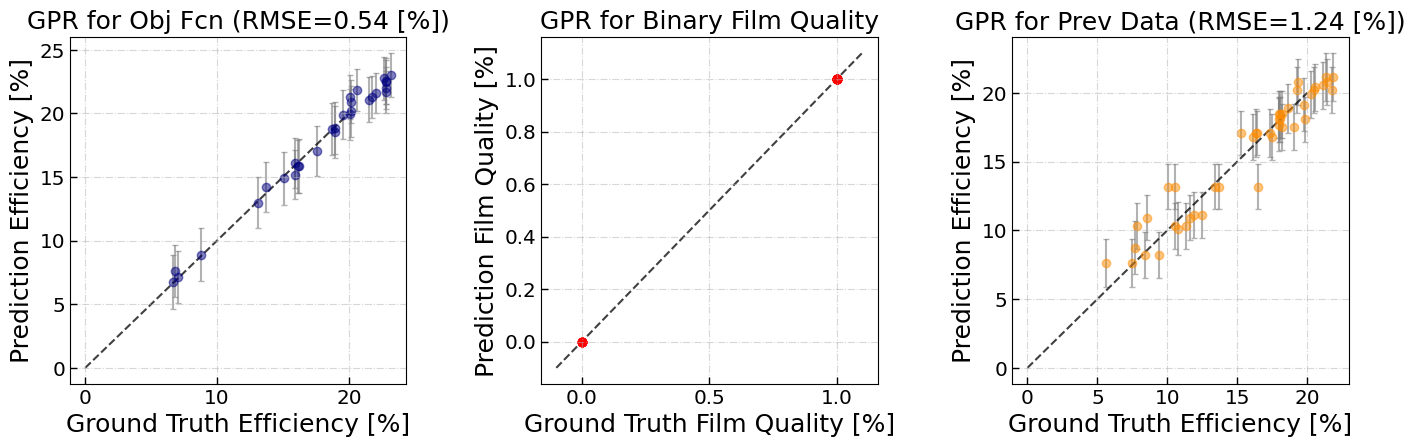

In [11]:
f_obj =  objective_model.model.predict
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

y_pred, y_uncer = f_obj(X)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

yc_pred, yc_uncer = f_cons1(Xc)
yc_pred = -yc_pred[:,-1]+yc_offset
yc_uncer = np.sqrt(yc_uncer[:,-1])

yc2_pred, yc2_uncer = f_cons2(Xc2)
yc2_pred = -yc2_pred[:,-1]+yc2_offset
yc2_uncer = np.sqrt(yc2_uncer[:,-1])


from sklearn.metrics import mean_squared_error
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 18
lims1 = (0, 20)
axes[0].scatter(Y[:,-1], y_pred, alpha = 0.5, c = 'navy' , edgecolor = 'navy')
axes[0].errorbar(Y[:,-1], y_pred, yerr = y_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[0].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Y[:,-1], y_pred))
title = 'GPR for Obj Fcn' + " (RMSE=%.2f" % rmse_value+' [%])'
axes[0].set_xlabel('Ground Truth Efficiency [%]', fontsize = fs)
axes[0].set_ylabel('Prediction Efficiency [%]', fontsize = fs)
axes[0].set_title(title, fontsize = fs)

lims2 = (-.1, 1.1)
axes[1].scatter(Yc[:,-1], yc_pred, alpha = 0.6, edgecolor = 'r', c = 'r')
axes[1].errorbar(Yc[:,-1], yc_pred, yerr = yc_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)

axes[1].plot(lims2, lims2, 'k--', alpha=0.75, zorder=0)
title = 'GPR for Binary Film Quality'
axes[1].set_xlabel('Ground Truth Film Quality [%]', fontsize = fs)
axes[1].set_ylabel('Prediction Film Quality [%]', fontsize = fs)
axes[1].set_title(title, fontsize = fs)


lims3 = (0, 17)
axes[2].scatter(Yc2[:,-1], yc2_pred, alpha = 0.5, c = 'darkorange', edgecolor = 'darkorange')
axes[2].errorbar(Yc2[:,-1], yc2_pred, yerr = yc2_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[2].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Yc2[:,-1], yc2_pred))
title = 'GPR for Prev Data' + " (RMSE=%.2f" % rmse_value+' [%])'

axes[2].set_xlabel('Ground Truth Efficiency [%]', fontsize = fs)
axes[2].set_ylabel('Prediction Efficiency [%]', fontsize = fs)
axes[2].set_title(title, fontsize = fs)

        
for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)

plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

mse = mean_squared_error
mse_all = mse(Y[:,-1], y_pred)
print ('all rmse: %.4f' % (np.sqrt(mse_all)))

rsquared_all = r2_score(Y[:,-1], y_pred)
print ('all R^2: %.4f' % (rsquared_all))

sprman_all = spearmanr(Y[:,-1], y_pred)
print ('all spearman: %.4f' % (sprman_all[0]))

all rmse: 0.5352
all R^2: 0.9883
all spearman: 0.9826


In [13]:
import numpy as np
## Expeceted Improvement (EI)
#acquisition = ExpectedImprovement(objective_model, jitter=.1)
## Lower Confidence Bound (LCB)
acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)

# fully integreated acquisition
#acquisition_generator = lambda m: ExpectedImprovement(m, jitter=.1)
# acquisition_generator = lambda m: NegativeLowerConfidenceBound(m, beta = 1)
# acquisition_integrated = IntegratedHyperParameterAcquisition(objective_model, acquisition_generator)
# acquisition = acquisition_integrated

# Make loop and collect points
bayesopt_cons_pr = ProbabilisticConstraintBayesianOptimizationLoop2(model_objective=objective_model, 
                                                          space=parameter_space, 
                                                          acquisition=acquisition,
                                                          model_constraint1=constraint_model1,
                                                          model_constraint2=constraint_model2,
                                                          batch_size = 22)#batchsize>20 to account for duplication

X_new = bayesopt_cons_pr.candidate_point_calculator.compute_next_points(bayesopt_cons_pr.loop_state)
X_new = x_normalizer(get_closest_array(x_denormalizer(X_new)))

f_obj =  objective_model.model.predict       
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

f_cons_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.evaluate
f_raw_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_1.evaluate
f_cons_pr = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_2.evaluate

print('total condition no.:', len(Xc))
print('total device no.:', len(bayesopt_cons_pr.loop_state.Y))
print('maximum Y (PCE [%]): ', -np.min(np.transpose(np.round(bayesopt_cons_pr.loop_state.Y, 2))))



df_Xnew = pd.DataFrame(get_closest_array(x_denormalizer(X_new)), columns = df_film.columns[1:10])
df_all = pd.concat([df_film.iloc[:,1:10], df_Xnew])#.sort_values(by=list(df_film.columns[1:10]))
df_all_ = df_all.drop_duplicates()
#df_Xnew = df_all_.iloc[len(df_film):len(df_film)]
df_Xnew = df_all_.iloc[20:40]
df_Xnew = df_Xnew.sort_values(by=list(df_film.columns[1:10]), ignore_index = True)
df_Xnew.index = np.arange(len(df_Xnew))+len(df_film)
df_Xnew

total condition no.: 40
total device no.: 30
maximum Y (PCE [%]):  23.21


,NMP (mL),DMF (mL),DMSO (mL),Perovskite concentration (M),Annealing temperature (℃),Vacuum Pressure (Pa),Vacuum Pressure time (s),Temperature (℃),Humidity (%)
40,0.0,25.0,50.0,1.20,130.0,20.0,5.0,25.0,25.0
41,0.0,25.0,50.0,1.30,130.0,20.0,20.0,25.0,25.0
42,0.0,45.0,55.0,1.10,120.0,400.0,40.0,25.0,25.0
43,0.0,55.0,45.0,1.00,145.0,180.0,50.0,25.0,25.0
44,0.0,85.0,10.0,1.40,120.0,60.0,20.0,25.0,25.0
45,0.0,85.0,10.0,1.40,130.0,60.0,20.0,25.0,25.0
46,0.0,85.0,10.0,1.40,130.0,70.0,20.0,25.0,25.0
47,0.0,85.0,10.0,1.40,130.0,80.0,30.0,25.0,25.0
48,0.0,85.0,10.0,1.50,130.0,50.0,20.0,25.0,25.0
49,0.0,85.0,10.0,1.50,130.0,60.0,20.0,25.0,25.0


In [14]:
X_new = x_normalizer(df_Xnew.values)

y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new
y_uncer_new = np.sqrt(y_uncer_new)

acq_produc = f_cons_acq(X_new)
acq_fcn = f_raw_acq(X_new)
acq_cons = f_cons_pr(X_new)

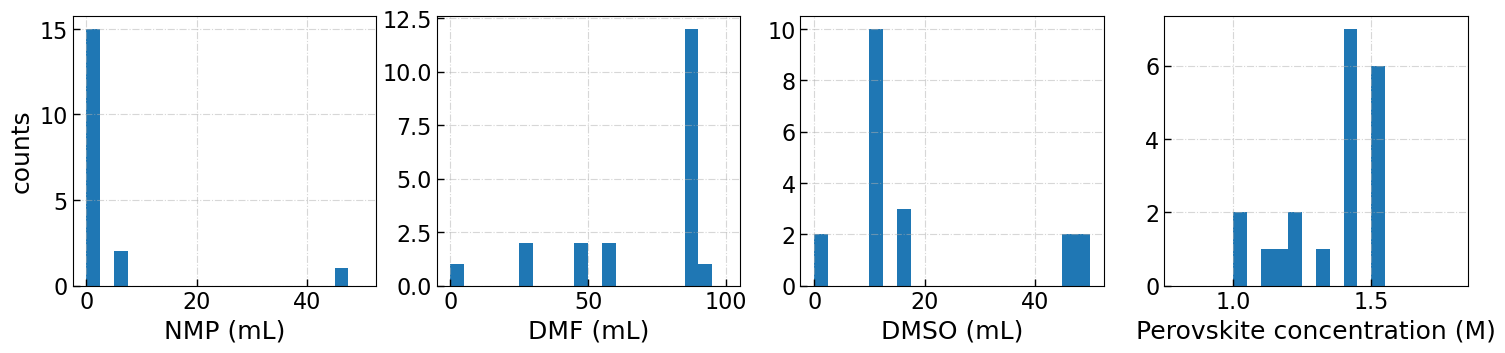

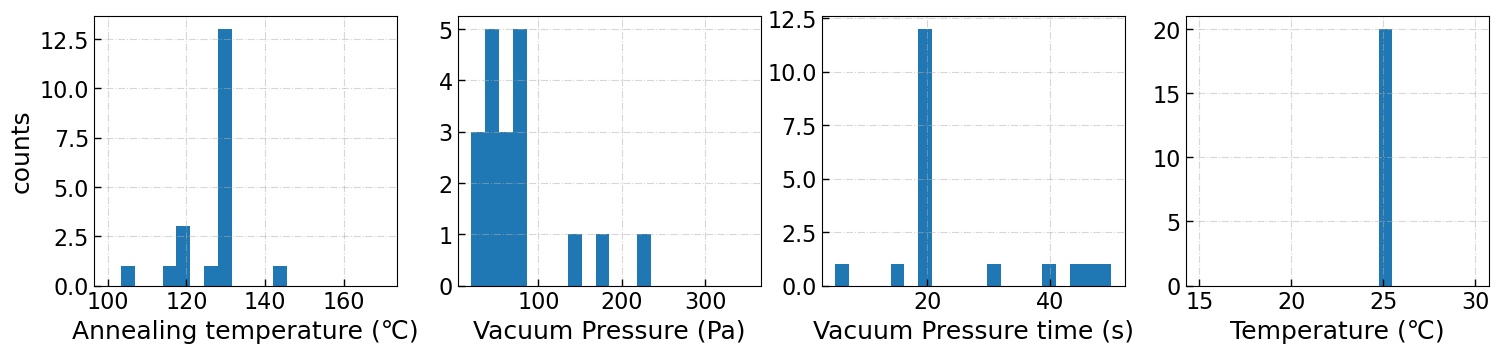

In [15]:
df = df_Xnew
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 8, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins= 20, range = (min(var_array[n]),max(var_array[n])))####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
            #axes[i].set_xlim(min(var_array[n])*0.8,max(var_array[n])*1.05)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

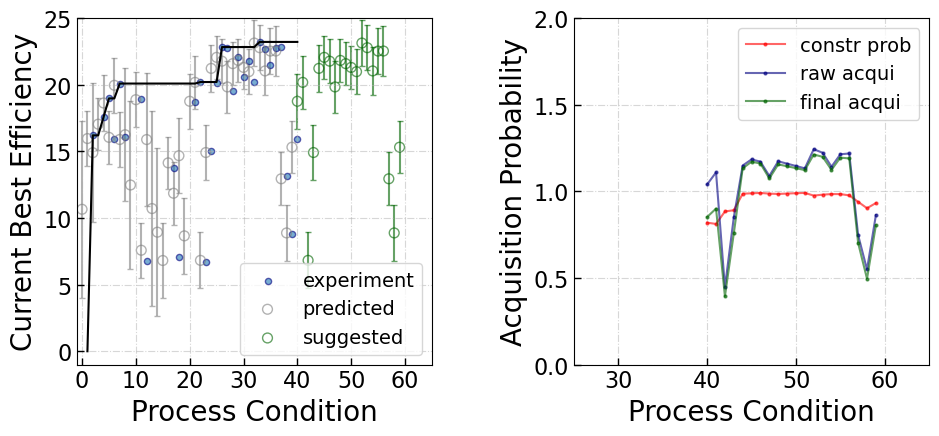

In [16]:
from emukit.core.initial_designs import RandomDesign
    
f_obj =  objective_model.model.predict       

device_eff = df_device.sort_values('Condition').iloc[:,[0,-2]].values
film_quality = df_film.sort_values('Condition').iloc[:,[0,-1]].values

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), sharey = False)
fs = 20
exp_cond = np.transpose(device_eff)[0]
exp_eff = np.transpose(device_eff)[1]

axes[0].scatter(exp_cond, exp_eff, #facecolor = 'none',
            edgecolor = 'navy', s = 20, alpha = 0.6, label = 'experiment')


unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
#axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
                #facecolor = 'none',
                #edgecolor = 'red',
                #s = 20, label = 'failed film')
all_cond = np.concatenate([device_eff, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), 
         marker = 'o', ms = 0, c = 'black')

X_sorted = x_normalizer(df_film.sort_values('Condition').iloc[:,1:10].values)
y_pred, y_uncer = f_obj(X_sorted)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

axes[0].scatter(np.arange(len(X_sorted)), y_pred,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'gray', label = 'predicted')
axes[0].errorbar(np.arange(len(X_sorted)), y_pred, yerr = y_uncer,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'gray', zorder = 0)

y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new[:,-1]
y_uncer_new = np.sqrt(y_uncer_new[:,-1])

axes[0].scatter(np.arange(len(X_new))+len(Xc), y_pred_new,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'darkgreen', label = 'suggested')
axes[0].errorbar(np.arange(len(X_new))+len(Xc), y_pred_new, yerr = y_uncer_new,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'darkgreen', zorder = 0)

axes[0].set_ylabel('Current Best Efficiency', fontsize = 20)
axes[0].set_xlabel('Process Condition', fontsize = 20)

axes[0].set_ylim(-1, 25)
axes[0].set_xlim(-1, 65)
axes[0].set_xticks(np.arange(0,61,10))
axes[0].legend(fontsize = fs*0.7)

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_cons, marker = 'o',
                ms = 2, alpha = 0.6, color = 'red', label = 'constr prob')
axes[1].plot(np.arange(len(X_new))+len(Xc), acq_fcn/20, marker = 'o',
                ms = 2, alpha = 0.6, color = 'navy', label = 'raw acqui')

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_produc/20, marker = 'o',
                ms = 2, alpha = 0.6, color = 'darkgreen', label = 'final acqui')

axes[1].set_ylim(0.0, 2)
axes[1].set_xlim(25, 65)
axes[1].set_xticks(np.arange(30,65,10))
axes[1].set_ylabel('Acquisition Probability', fontsize = fs)
axes[1].set_xlabel('Process Condition', fontsize = fs)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.7)
plt.show()

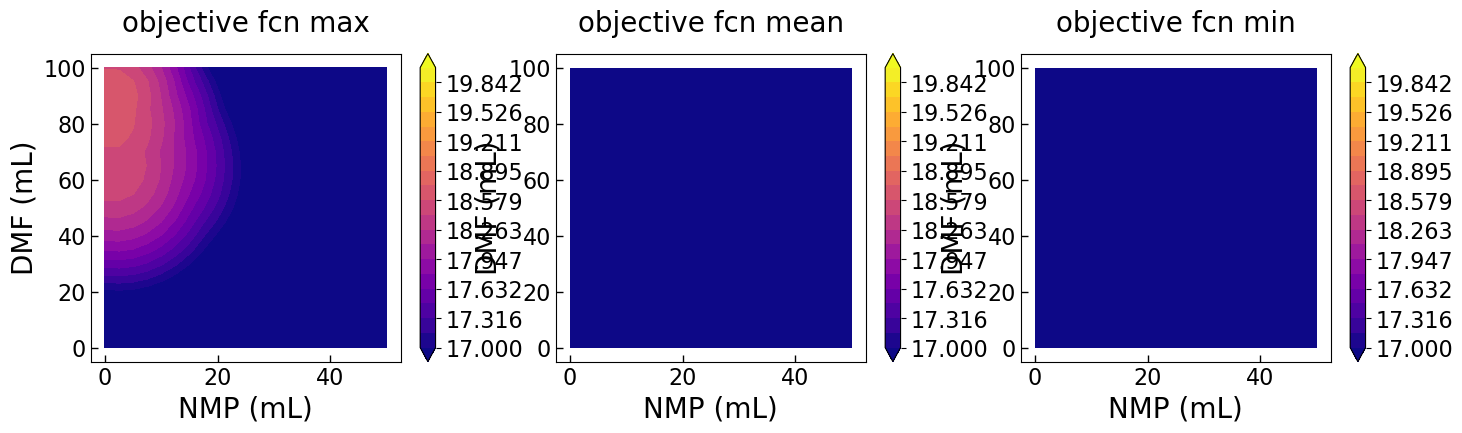

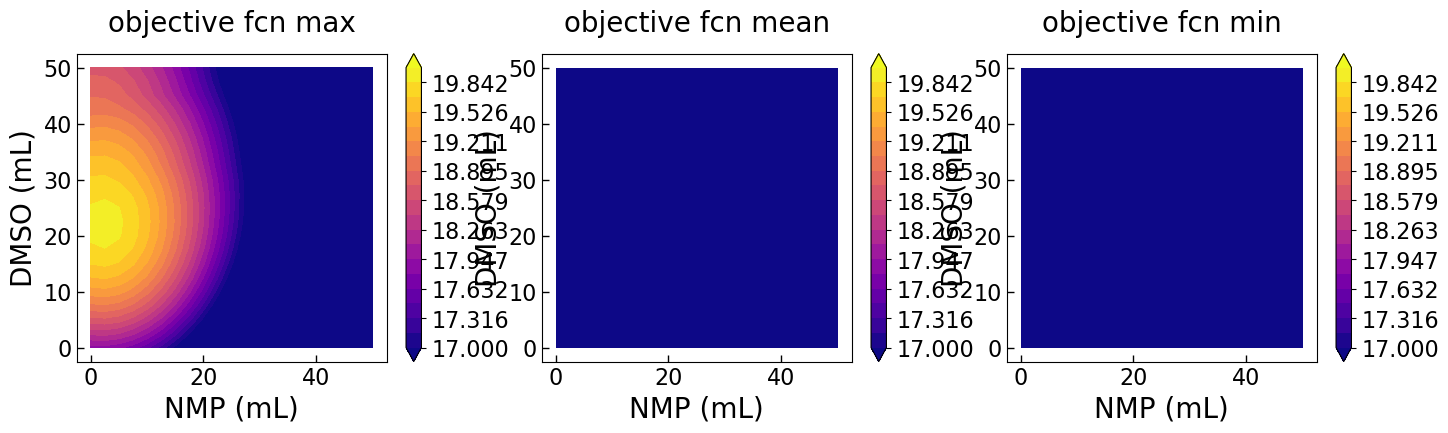

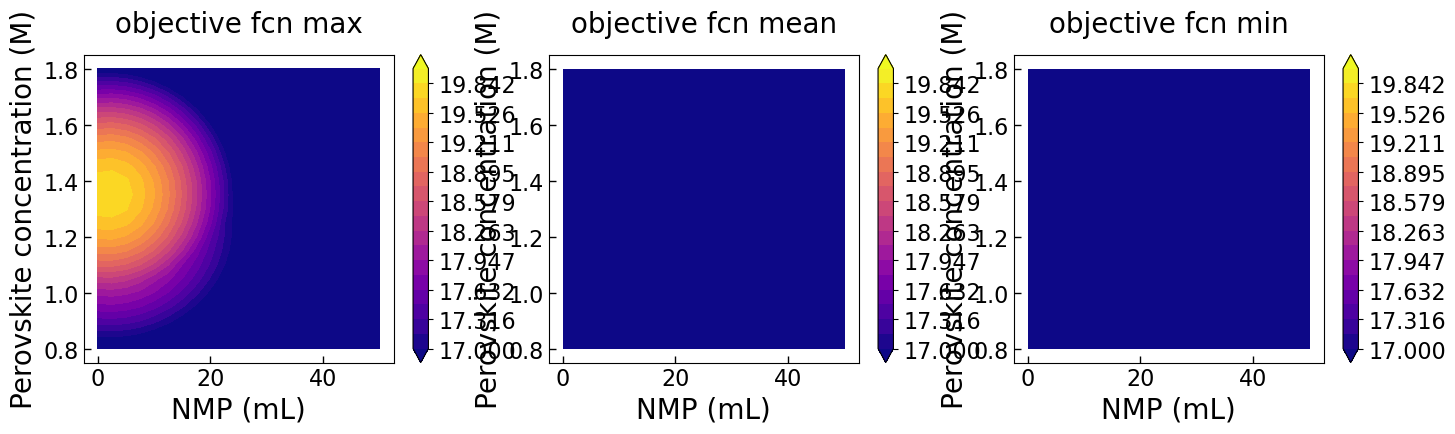

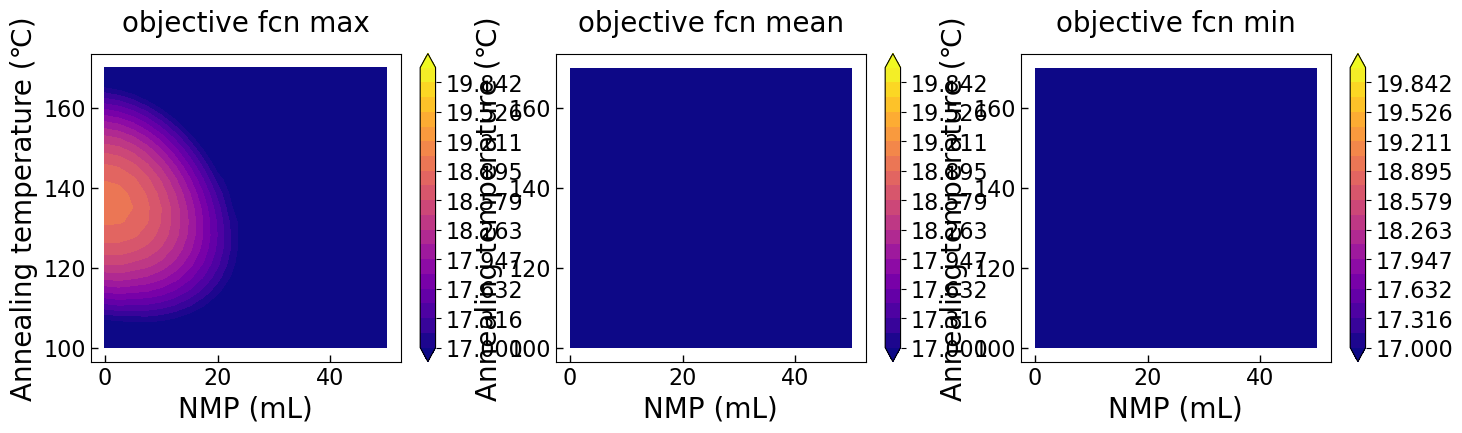

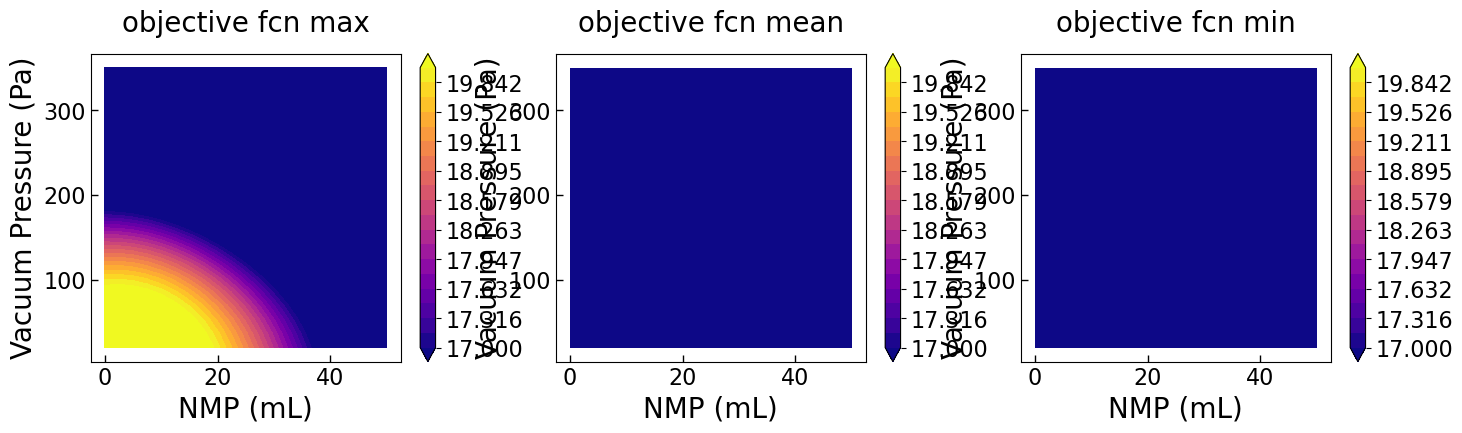

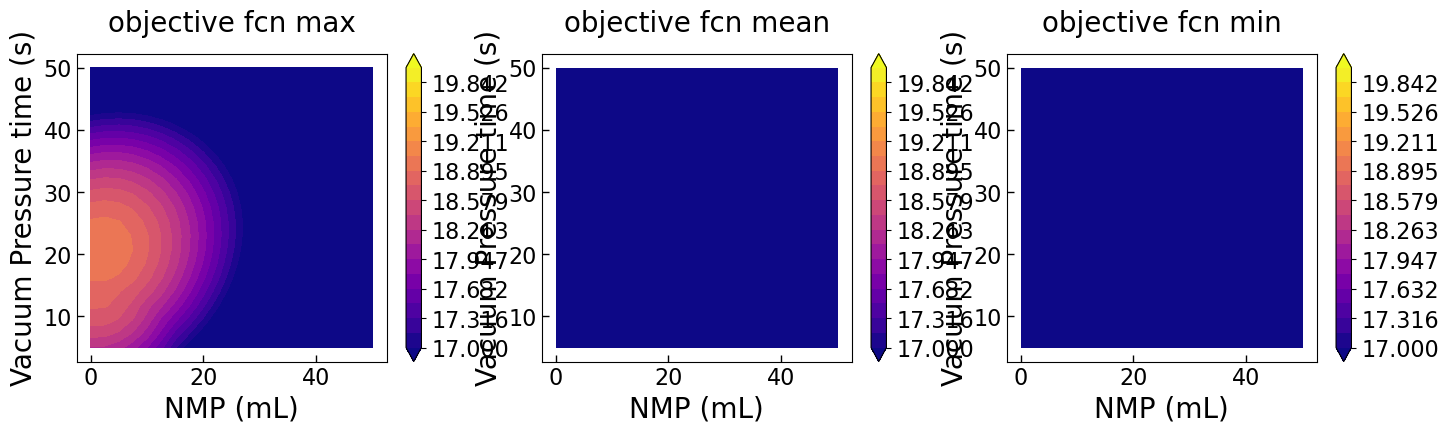

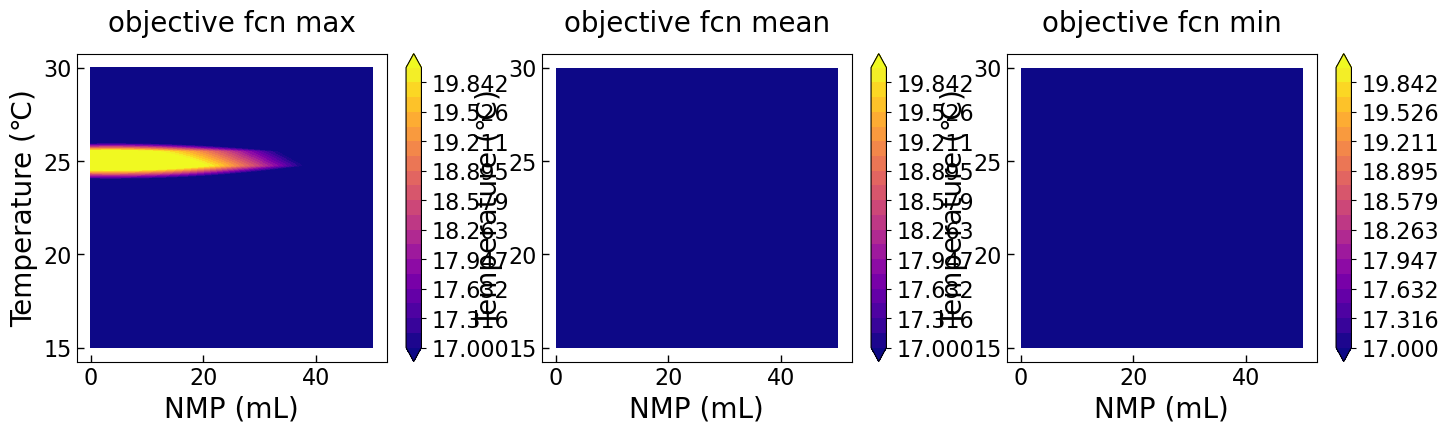

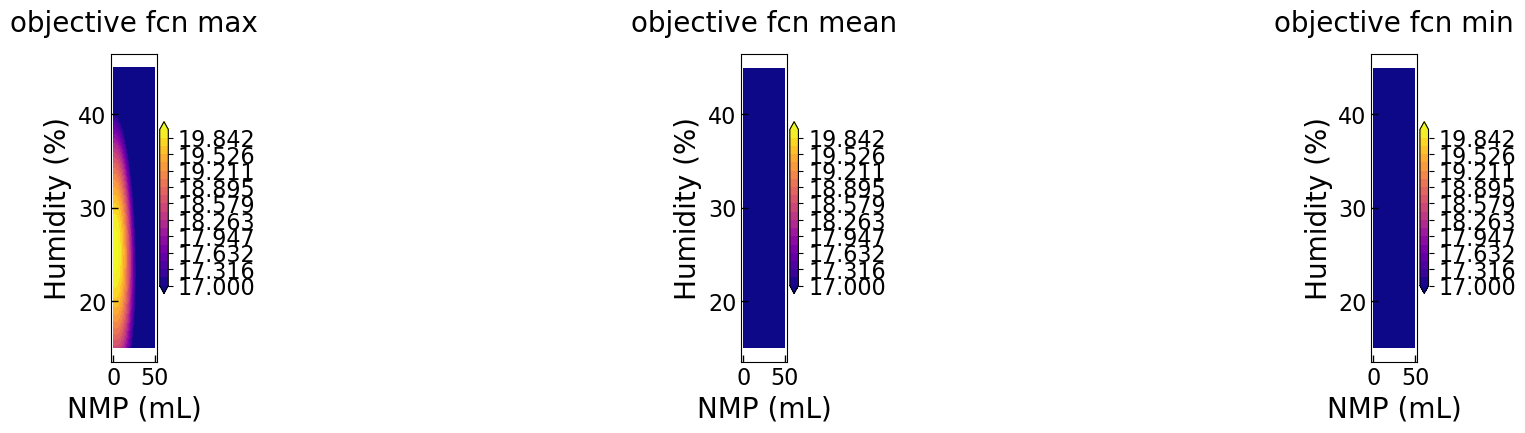

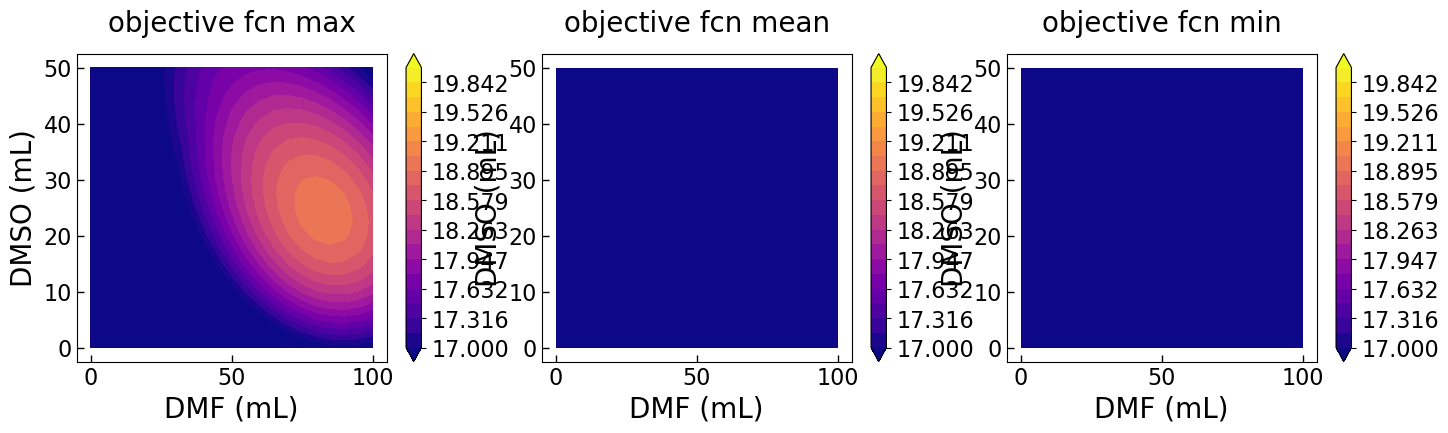

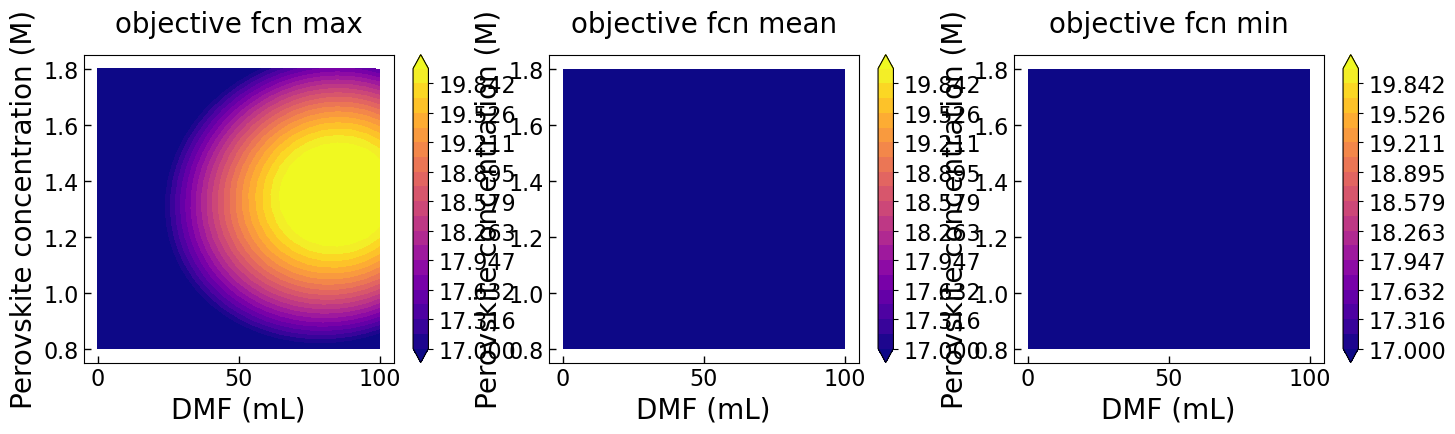

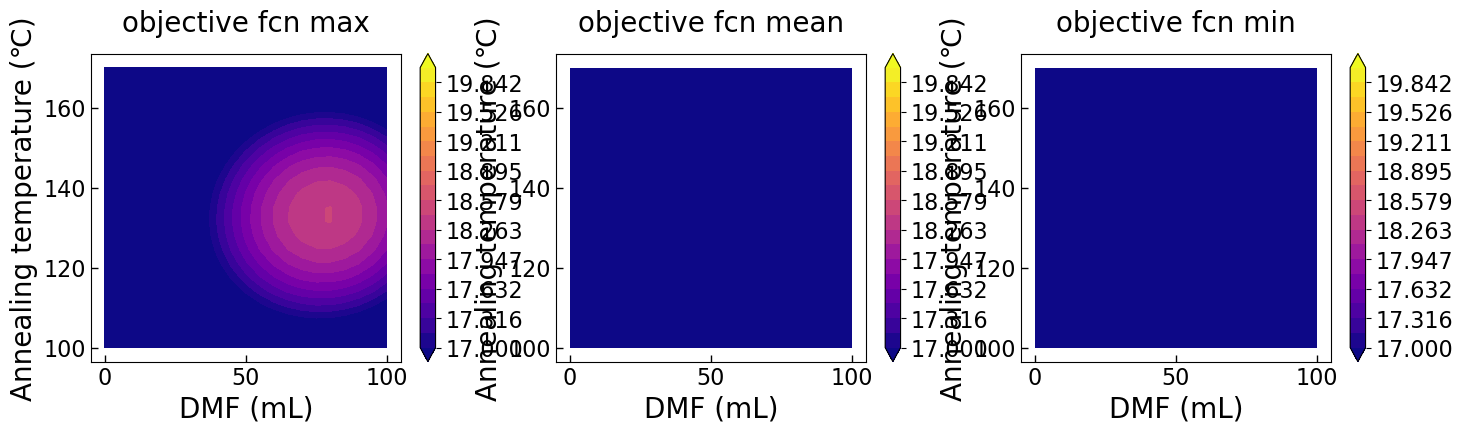

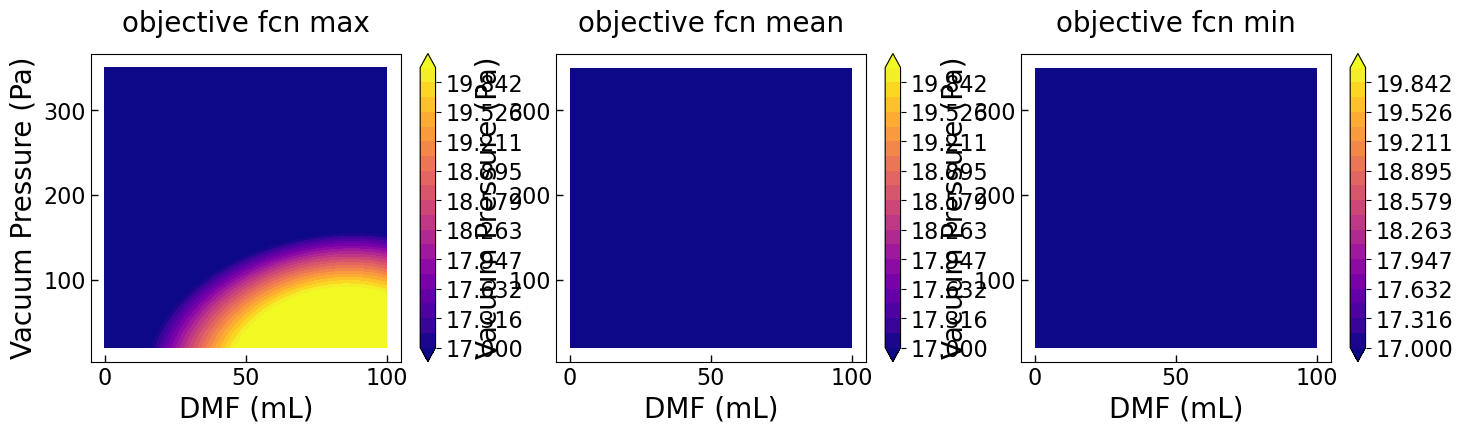

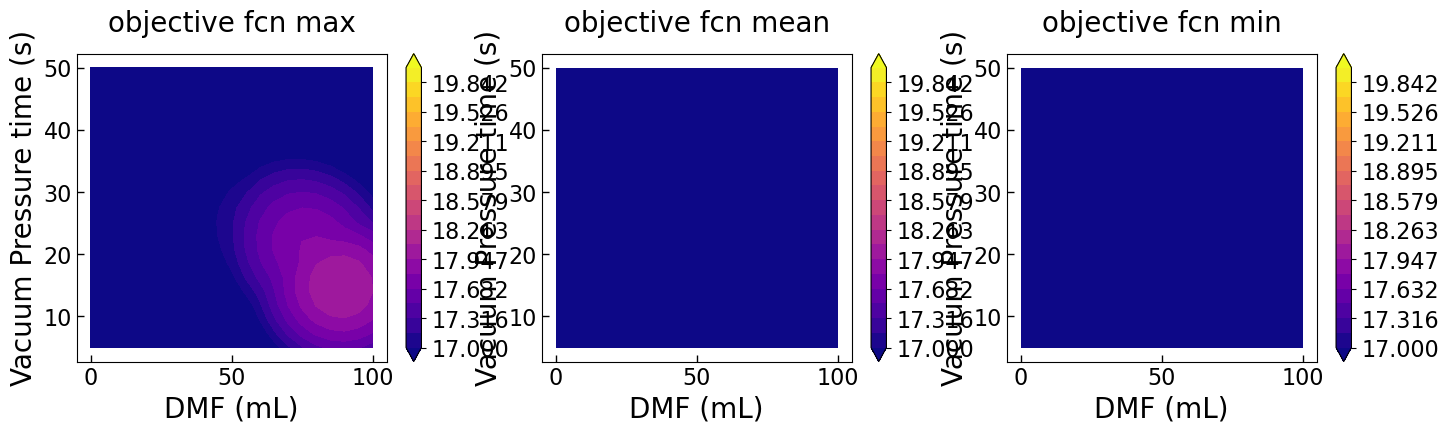

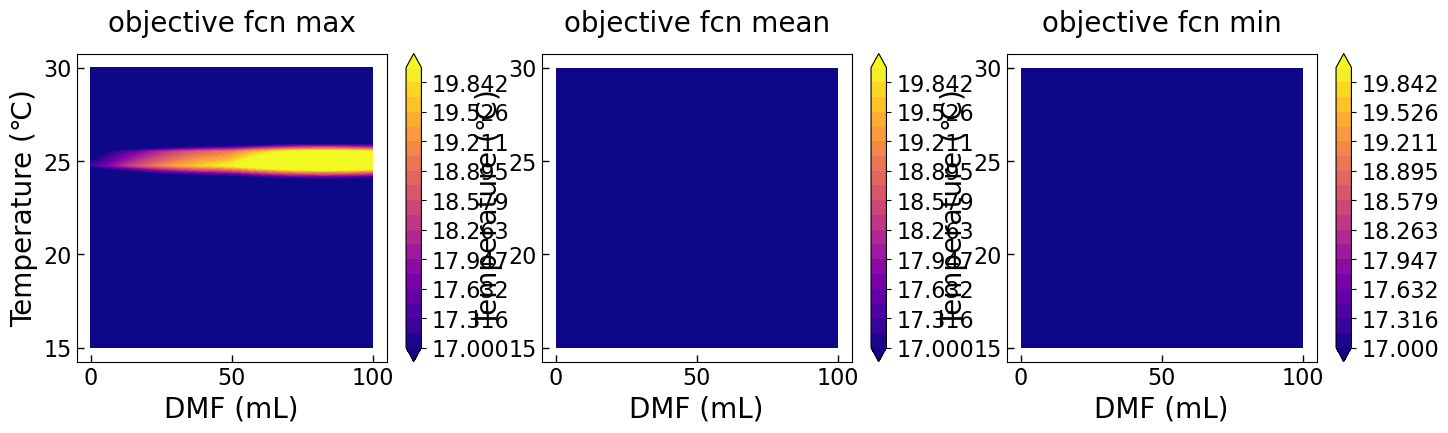

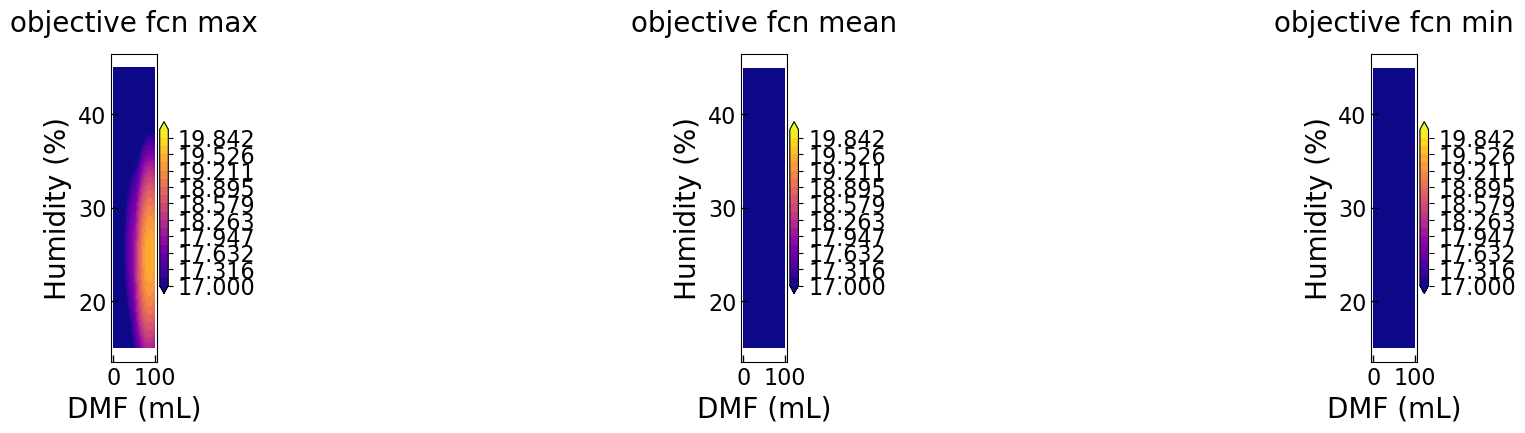

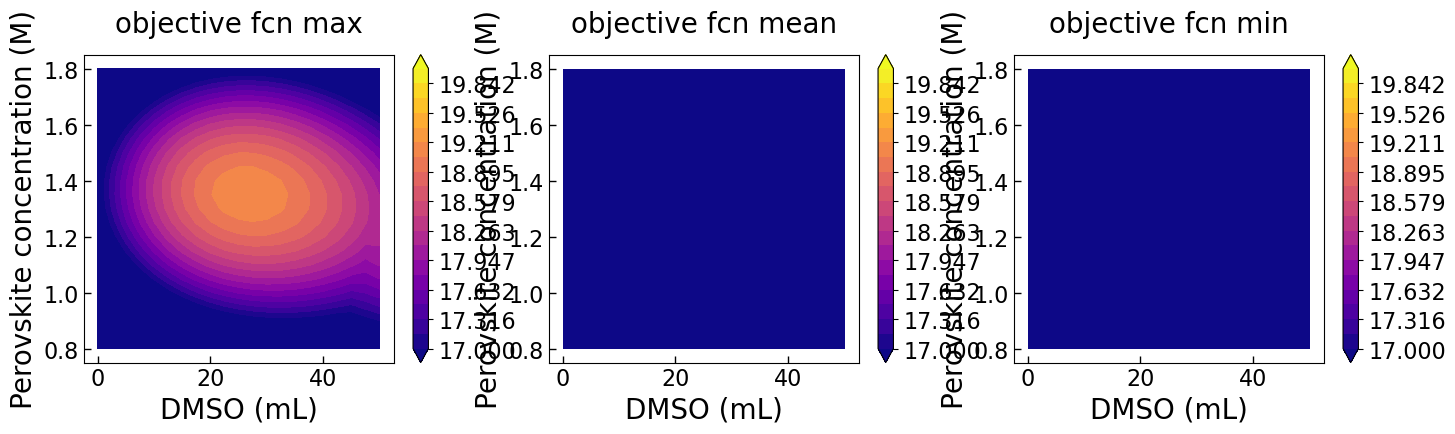

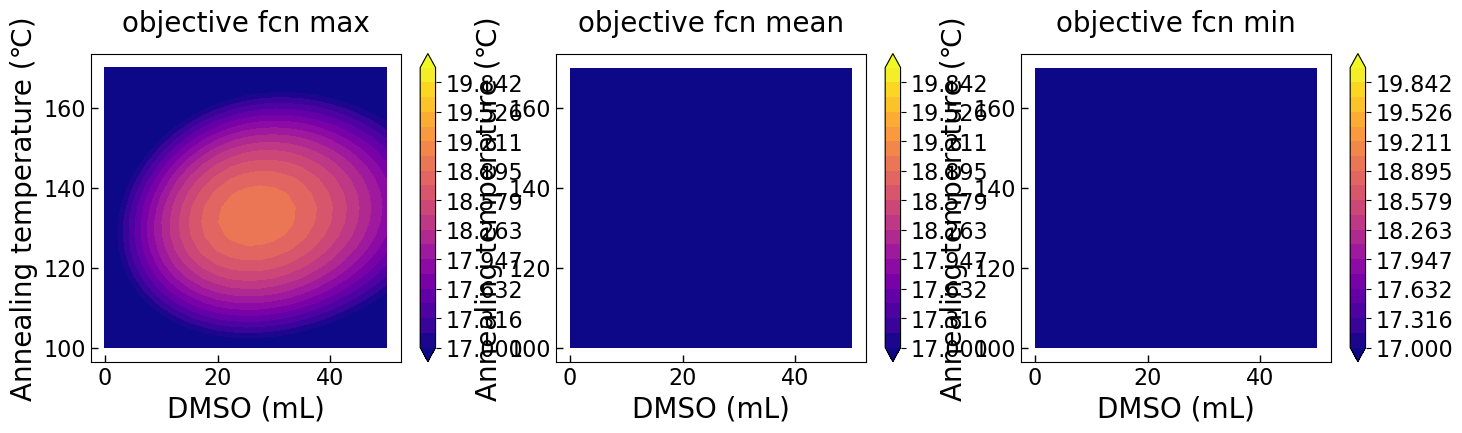

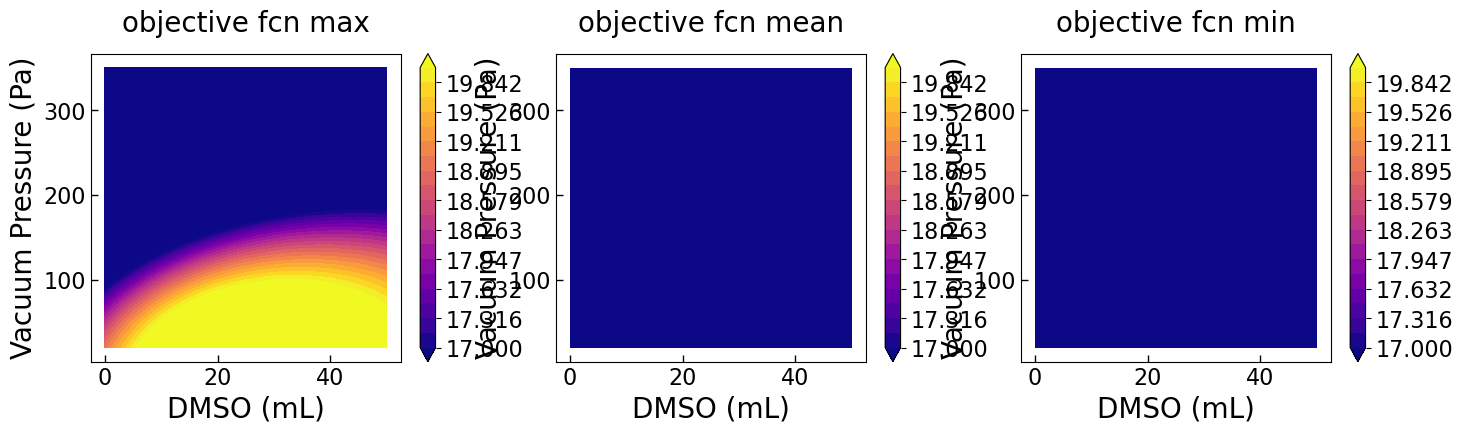

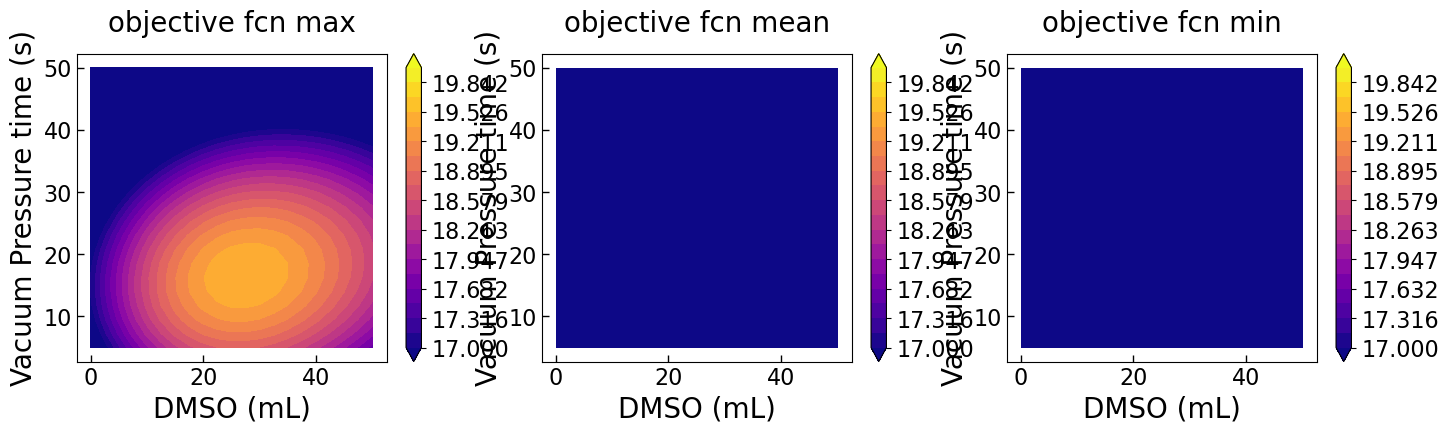

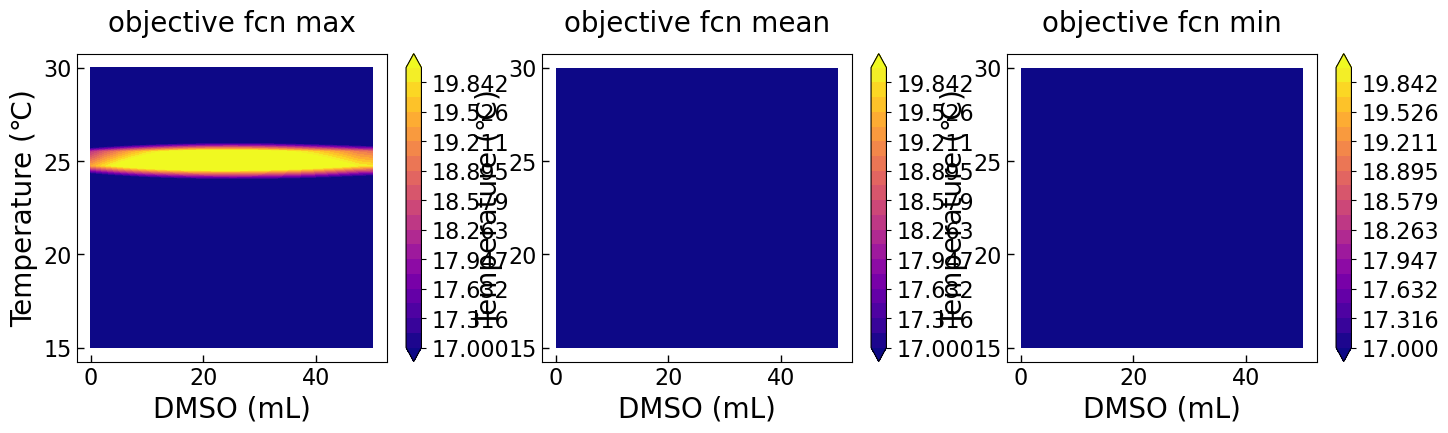

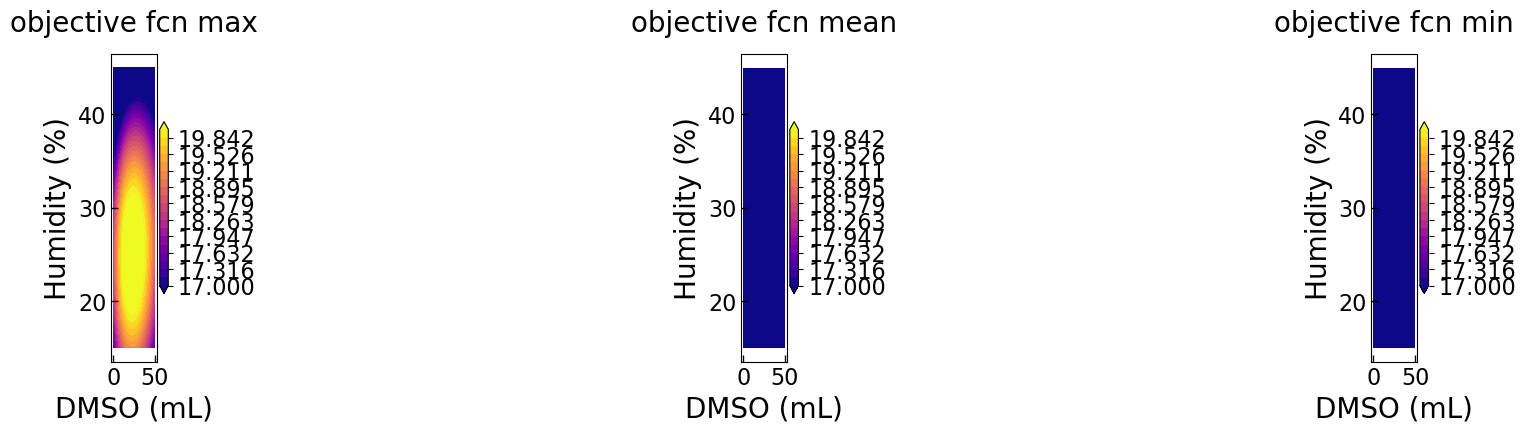

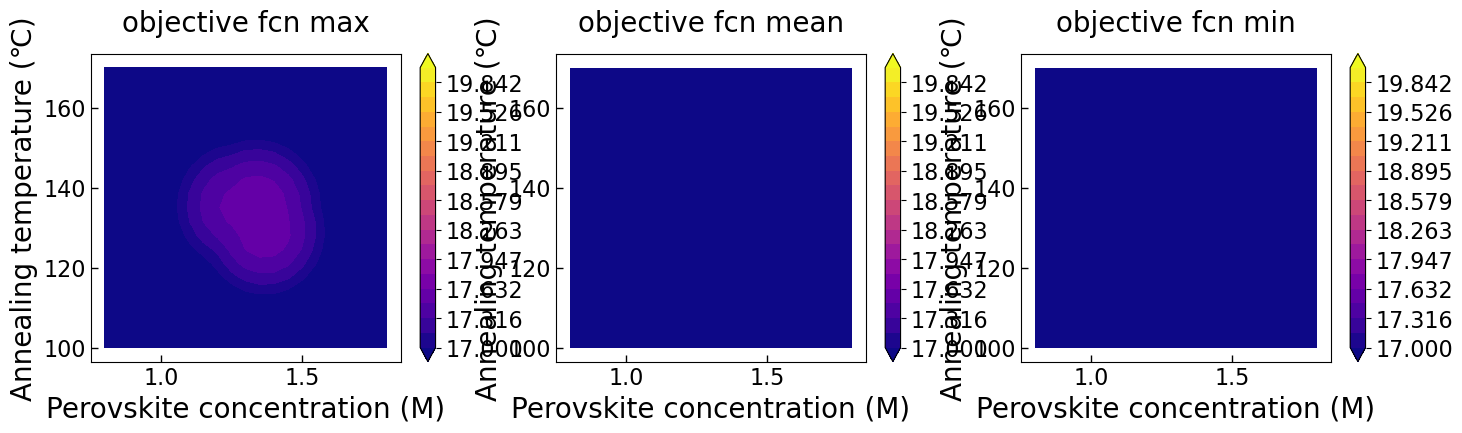

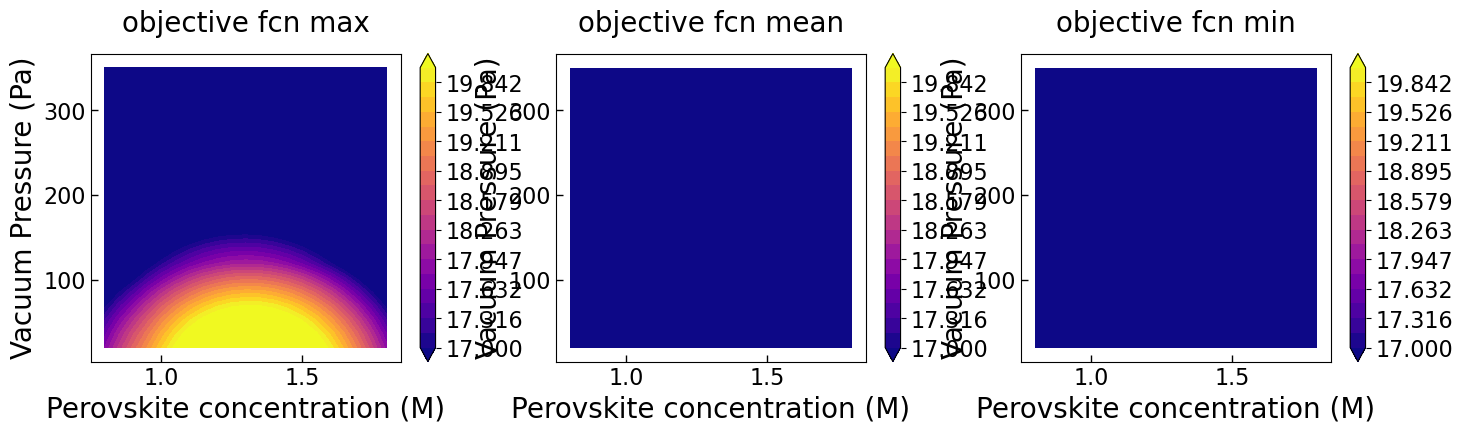

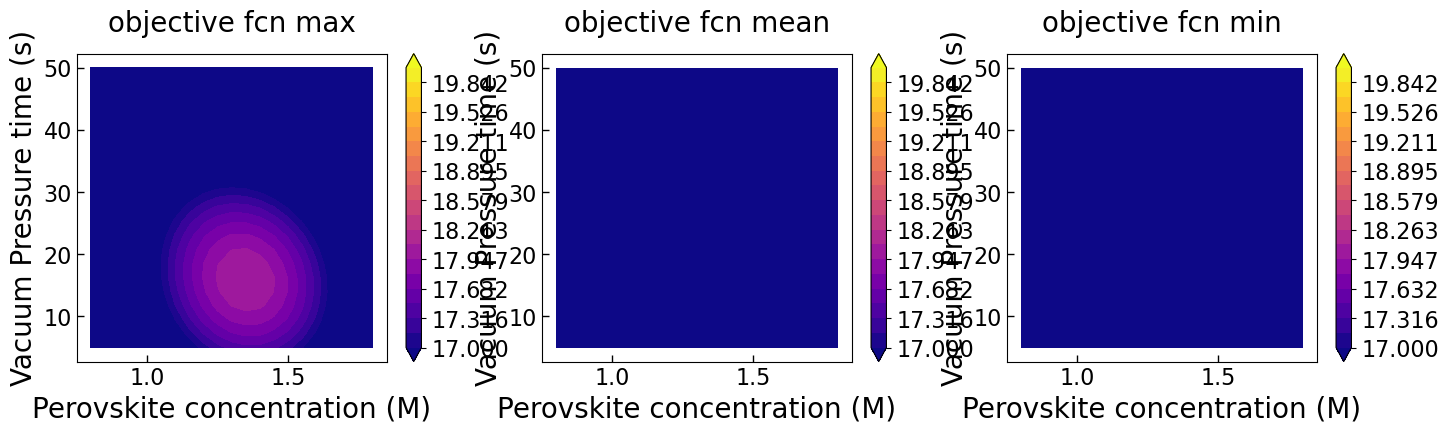

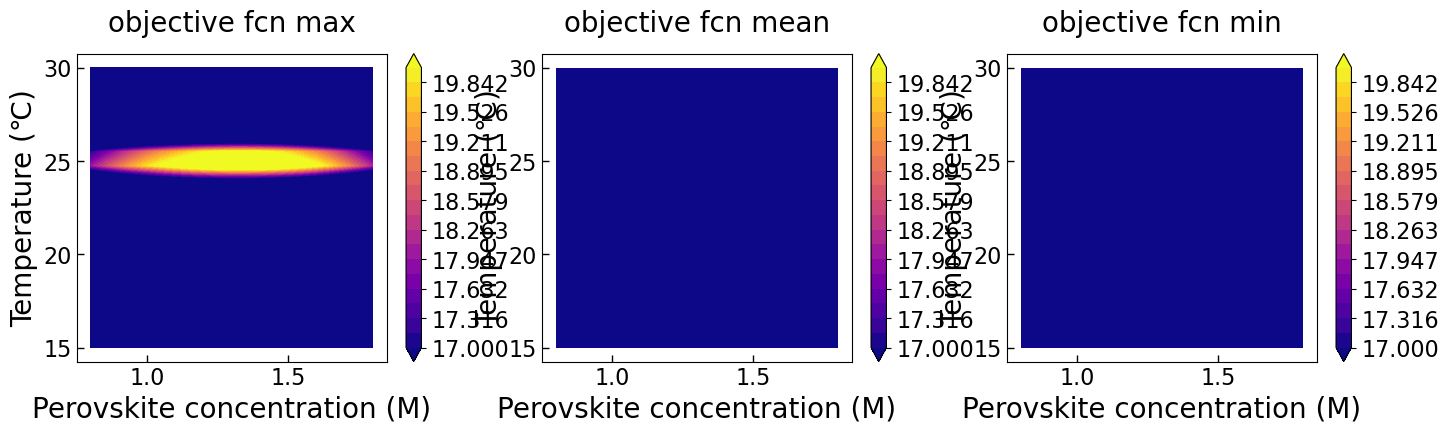

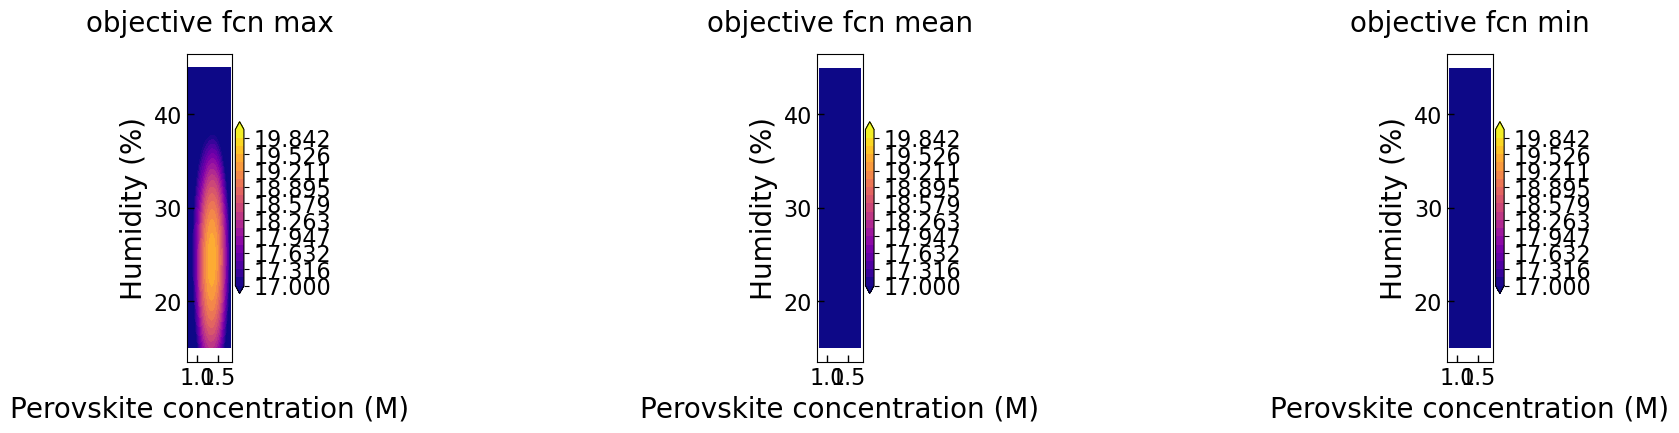

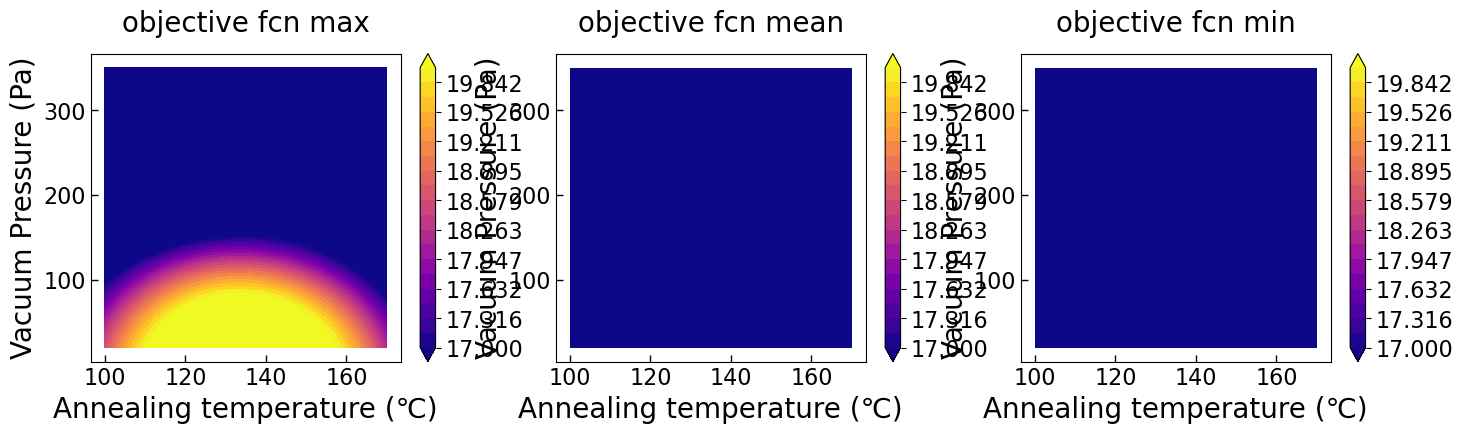

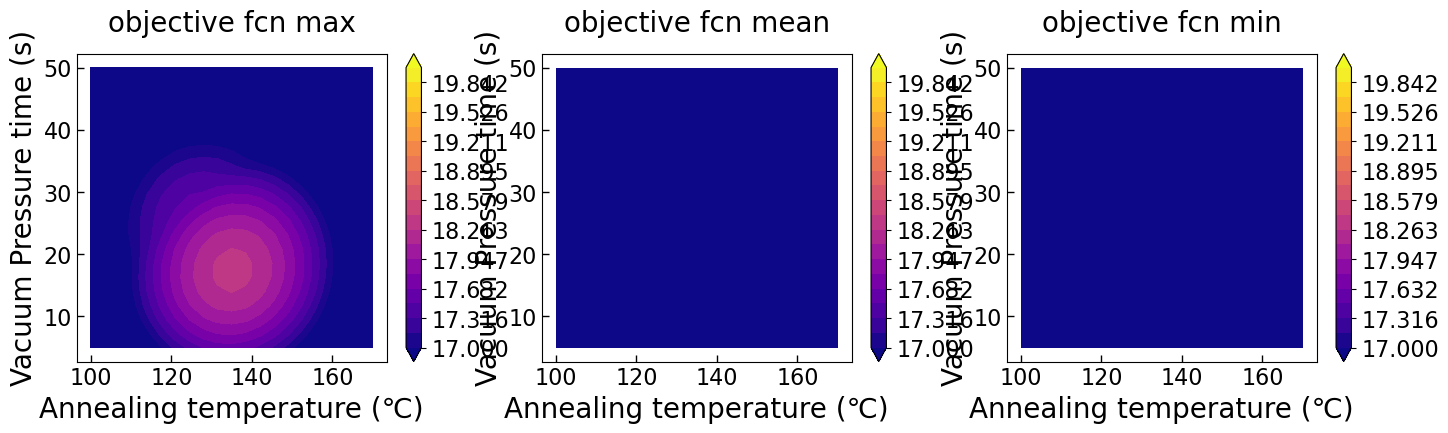

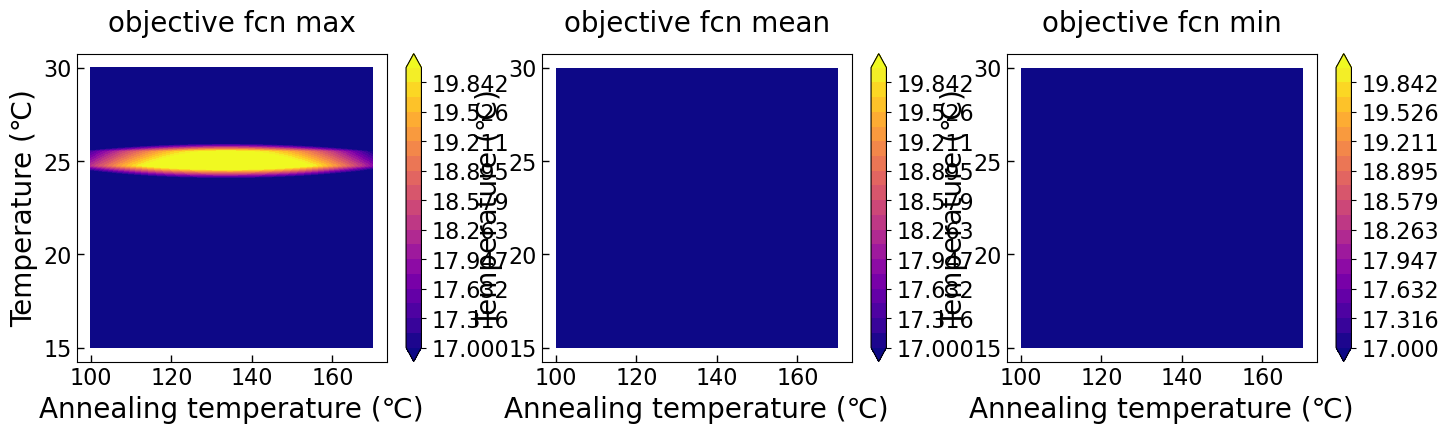

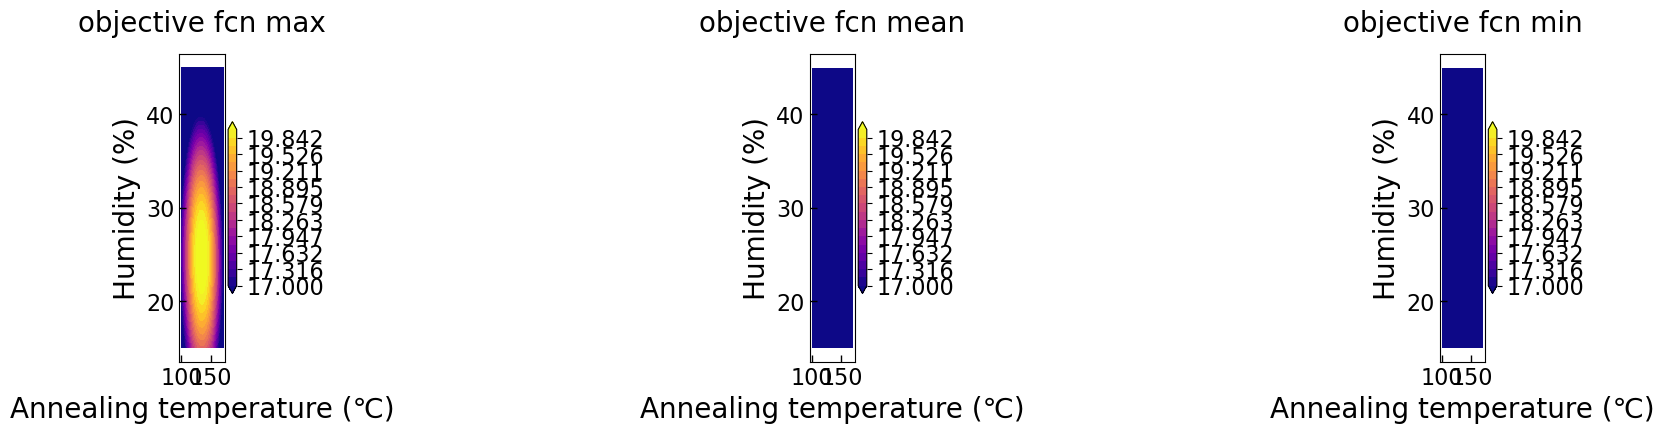

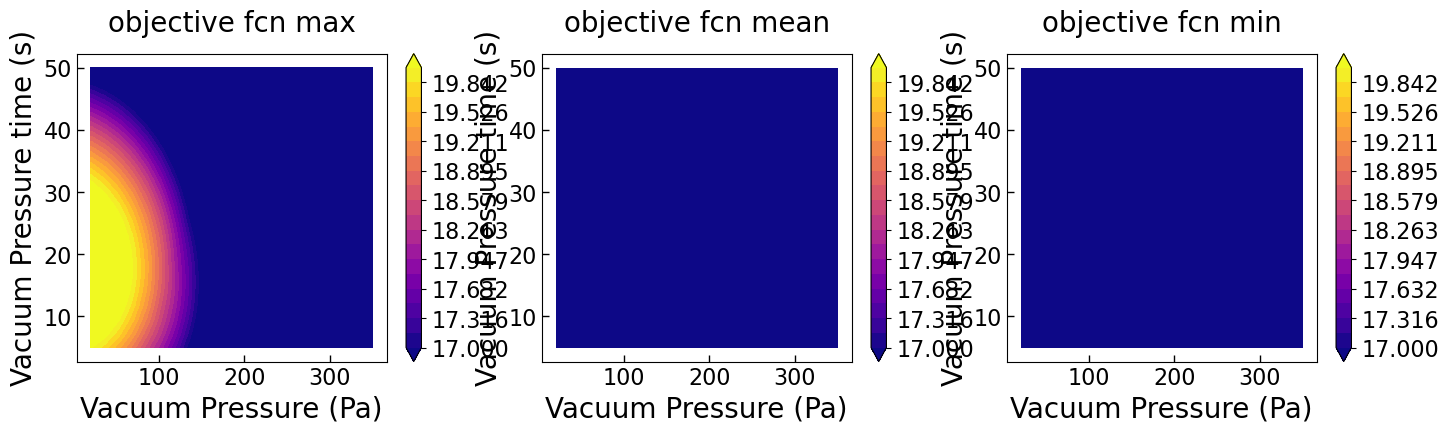

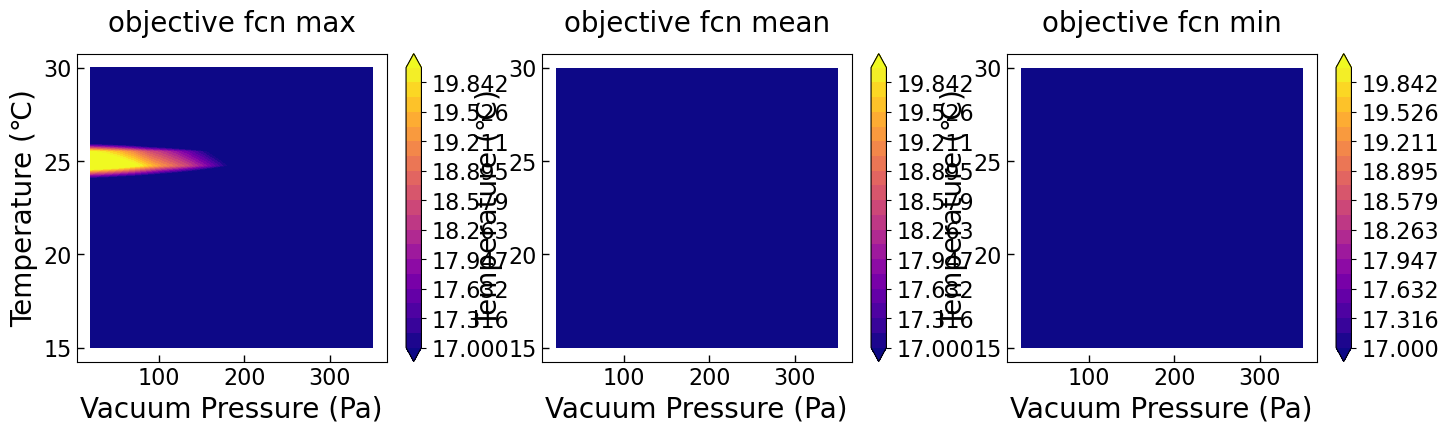

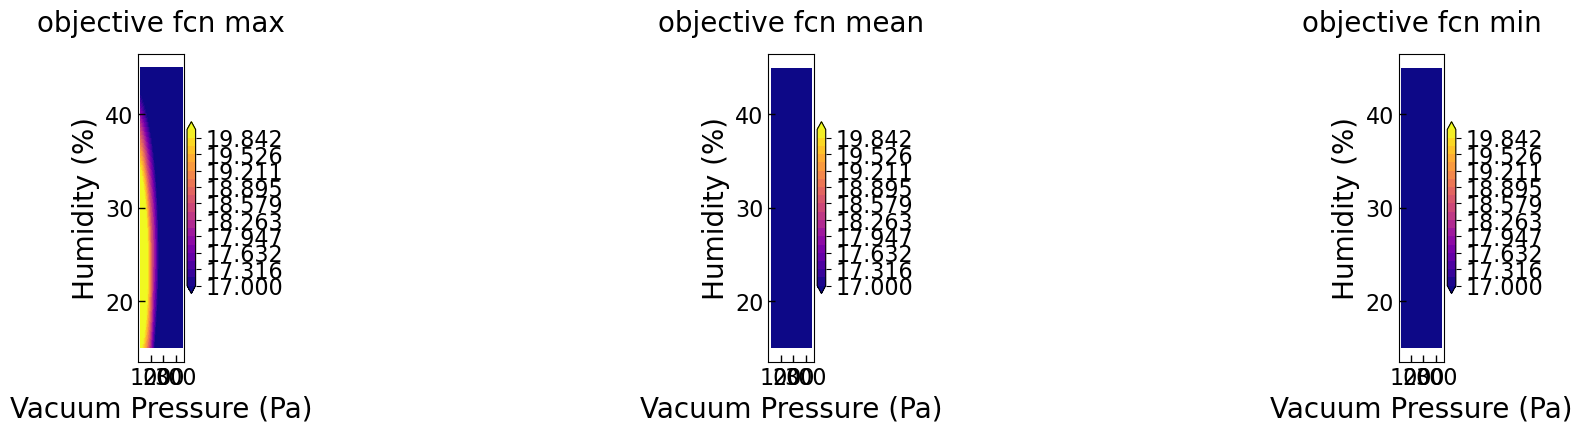

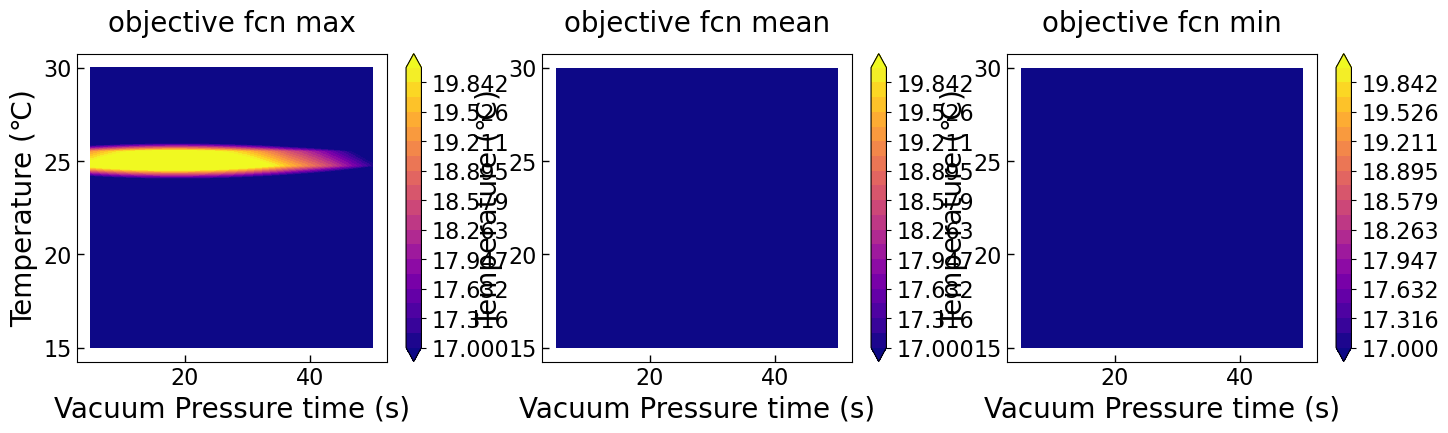

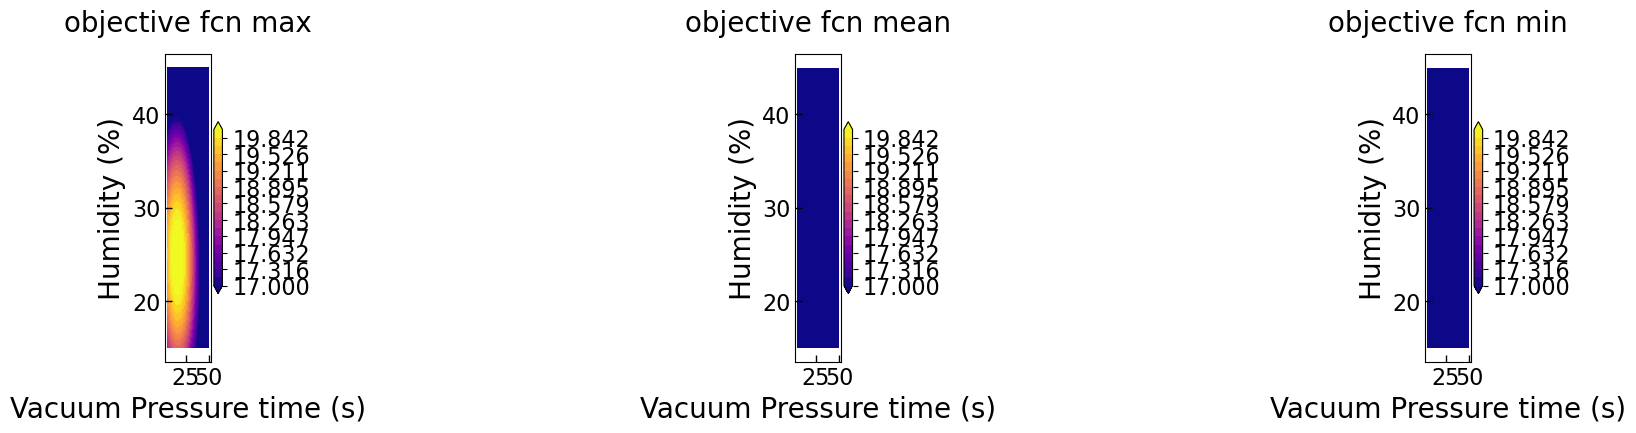

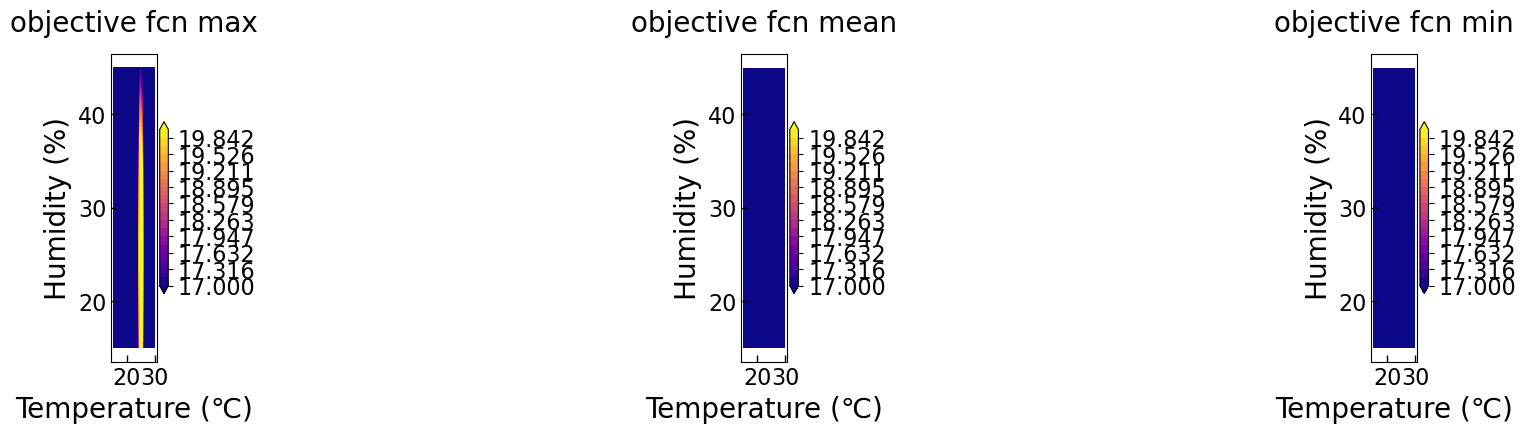

<Figure size 640x480 with 0 Axes>

In [25]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(1000)
x_columns = df_device.iloc[:,1 :10].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):

        # Generate a 2D grid for Contour plot
        ind1 = i
        ind2 = j+i+1
        n_steps = 21
        x1x2y_pred, x1x2y_uncer = [[], []]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:, ind1] = x1
                x_temp[:, ind2] = x2
                y_pred, y_uncer = f_obj(x_temp)
                y_pred = -y_pred
                x1_org = x_denormalizer(x_temp)[0, ind1]
                x2_org = x_denormalizer(x_temp)[0, ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(y_pred), np.mean(y_pred), np.min(y_pred)])
                x1x2y_uncer.append([x1_org, x2_org, np.max(np.sqrt(y_uncer)), np.mean(np.sqrt(y_uncer)), np.min(np.sqrt(y_uncer))])

        x1 = np.array(x1x2y_pred, dtype=object)[:, 0].reshape(n_steps, n_steps)
        x2 = np.array(x1x2y_pred, dtype=object)[:, 1].reshape(n_steps, n_steps)

        y_pred_max = np.array(x1x2y_pred, dtype=object)[:, 2].reshape(n_steps, n_steps)
        y_pred_mean = np.array(x1x2y_pred, dtype=object)[:, 3].reshape(n_steps, n_steps)
        y_pred_min = np.array(x1x2y_pred, dtype=object)[:, 4].reshape(n_steps, n_steps)

        y_uncer_max = np.array(x1x2y_uncer, dtype=object)[:, 2].reshape(n_steps, n_steps)
        y_uncer_mean = np.array(x1x2y_uncer, dtype=object)[:, 3].reshape(n_steps, n_steps)
        y_uncer_min = np.array(x1x2y_uncer, dtype=object)[:, 4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16

        # Contour for Prediction Efficiency Mean
        fig, axes = plt.subplots(1, 3, figsize=(17, 4), sharey=False, sharex=False)
        colorbar_offset = [12.5, 7, 4]
        for ax, c_offset, y in zip(axes, colorbar_offset,
                                   [y_pred_max, y_pred_mean, y_pred_min]):

            #c_plt1 = ax.contourf(x1, x2, y, levels=np.arange(19) * 0.25, cmap='plasma', extend = 'both')
            c_plt1 = ax.contourf(x1, x2, y, levels=np.linspace(17, 20, 20).tolist(), cmap='plasma', extend = 'both')
            cbar = fig.colorbar(c_plt1, ax=ax)
            cbar.ax.tick_params(labelsize=fs * 0.8)
            #ax.scatter(x_denormalizer(X)[:, ind1],
                       #x_denormalizer(X)[:, ind2],
                       #s=30, facecolors='gray', alpha=0.5, edgecolor='gray')
            #ax.scatter(x_denormalizer(X_new)[:, ind1],
                       #x_denormalizer(X_new)[:, ind2],
                       #s=50, facecolors='none', alpha=0.9, edgecolor='green')
            ax.set_xlabel(str(x_columns[ind1]), fontsize=fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize=fs)

            x1_delta = (np.max(x1) - np.min(x1)) * 0.05
            x2_delta = (np.max(x2) - np.min(x2)) * 0.05
            ax.set_xlim(np.min(x1) - x1_delta, np.max(x1) + x1_delta)
            ax.set_ylim(np.min(x2) - x2_delta, np.max(x2) + x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize=fs * 0.8)

           # Update tick marks based on new dataset
            #if ind1 == 4:  # Annealing temperature
                #ax.set_xticks([100, 125, 135, 145, 155])
            #if ind1 == 5:  # Vacuum Pressure
                #ax.set_xticks([50, 100, 200, 250, 270])
            #if ind1 == 6:  # Vacuum Pressure time
                #ax.set_xticks([15, 17, 18, 25, 35, 45, 47])
            #if ind1 == 7:  # Temperature
                #ax.set_xticks([25])
            #if ind1 == 8:  # Humidity
                #ax.set_xticks([30])

            #if ind2 == 4:  # Annealing temperature
                #ax.set_yticks([100, 125, 135, 145, 155])
            #if ind2 == 5:  # Vacuum Pressure
                #ax.set_yticks([50, 100, 200, 250, 270])
            #if ind2 == 6:  # Vacuum Pressure time
                #ax.set_yticks([15, 17, 18, 25, 35, 45, 47])
            #if ind2 == 7:  # Temperature
                #ax.set_yticks([25])
            #if ind2 == 8:  # Humidity
                #ax.set_yticks([30])

        axes[0].set_title('objective fcn max', pad=title_pad, fontsize=fs)
        axes[1].set_title('objective fcn mean', pad=title_pad, fontsize=fs)
        axes[2].set_title('objective fcn min', pad=title_pad, fontsize=fs)

    plt.subplots_adjust(wspace=10)
    plt.show()